# КЕЙС 1

In [ ]:
# Установим интерактивный режим для отображения графиков
import matplotlib
# Используем интерактивный бэкенд для отображения графиков
# В разных средах могут быть разные бэкенды
# Для Jupyter:
# %matplotlib inline
# Для Colab:
# %matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Чтение данных
df = pd.read_csv('1.csv', encoding='utf-8')
print("Структура данных:")
print(df.columns.tolist())
print("\nПервые строки:")
print(df.head())

# 1. Загрузка и предобработка данных
regions_df = df.iloc[3:].reset_index(drop=True)

# 2. Очистка значений
def clean_number(x):
    if isinstance(x, str):
        # Заменяем тире на 0 и убираем пробелы
        cleaned = x.replace('–', '0').replace(' ', '').strip()
        # Если после очистки пустая строка - возвращаем 0
        if cleaned == '' or cleaned == '-':
            return 0.0
        try:
            return float(cleaned)
        except:
            return 0.0
    elif pd.isna(x):
        return 0.0
    return float(x)

# 3. Фильтрация федеральных округов
federal_districts = regions_df[regions_df['Содержание'].str.contains('федеральный округ', na=False)]
district_names = [name.replace(' федеральный округ', '') for name in federal_districts['Содержание']]

# Подготовим данные для графиков
total_population = [clean_number(x) for x in federal_districts.iloc[:, 1]]
male_population = [clean_number(x) for x in federal_districts.iloc[:, 2]]
female_population = [clean_number(x) for x in federal_districts.iloc[:, 3]]

# Данные для России
russia_row = df[df['Содержание'] == 'Российская Федерация']
if not russia_row.empty:
    male_total = clean_number(russia_row.iloc[0, 2])
    female_total = clean_number(russia_row.iloc[0, 3])
else:
    male_total = sum(male_population)
    female_total = sum(female_population)

Структура данных:
['Содержание', 'Все население', 'Unnamed: 2', 'Unnamed: 3', 'Городское население', 'Unnamed: 5', 'Unnamed: 6', 'Сельское население', 'Unnamed: 8', 'Unnamed: 9']

Первые строки:
                      Содержание       Все население Unnamed: 2 Unnamed: 3  \
0                            NaN  мужчины\nи женщины    мужчины    женщины   
1                            NaN                 NaN        NaN        NaN   
2           Российская Федерация           146150789   67917353   78233436   
3  Центральный федеральный округ            40198659   18618593   21580066   
4           Белгородская область             1500659     694674     805985   

  Городское население Unnamed: 5 Unnamed: 6  Сельское население Unnamed: 8  \
0  мужчины\nи женщины    мужчины    женщины  мужчины\nи женщины    мужчины   
1                 NaN        NaN        NaN                 NaN        NaN   
2           109526940   50213973   59312967            36623849   17703380   
3            33031478   

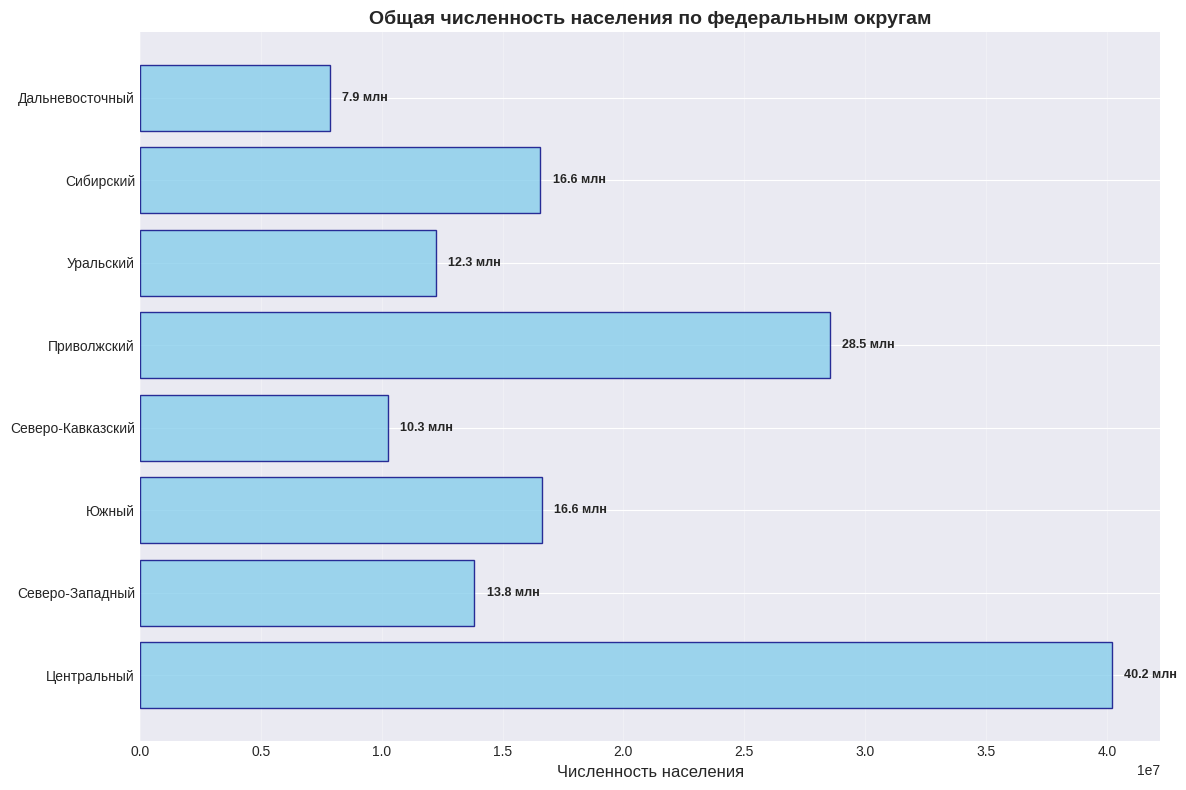

Всего населения в федеральных округах: 146.2 млн
Самый населенный округ: Центральный - 40.2 млн
Наименее населенный округ: Дальневосточный - 7.9 млн


In [ ]:
# График 1: Общая численность населения
plt.figure(figsize=(12, 8))
bars = plt.barh(district_names, total_population, color='skyblue', edgecolor='navy', alpha=0.8)
plt.xlabel('Численность населения', fontsize=12)
plt.title('Общая численность населения по федеральным округам', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Добавляем подписи значений
for bar, value in zip(bars, total_population):
    plt.text(bar.get_width() + 500000, bar.get_y() + bar.get_height() / 2,
             f'{value / 1000000:.1f} млн', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Вывод статистики
print(f"Всего населения в федеральных округах: {sum(total_population)/1000000:.1f} млн")
print(f"Самый населенный округ: {district_names[total_population.index(max(total_population))]} - {max(total_population)/1000000:.1f} млн")
print(f"Наименее населенный округ: {district_names[total_population.index(min(total_population))]} - {min(total_population)/1000000:.1f} млн")

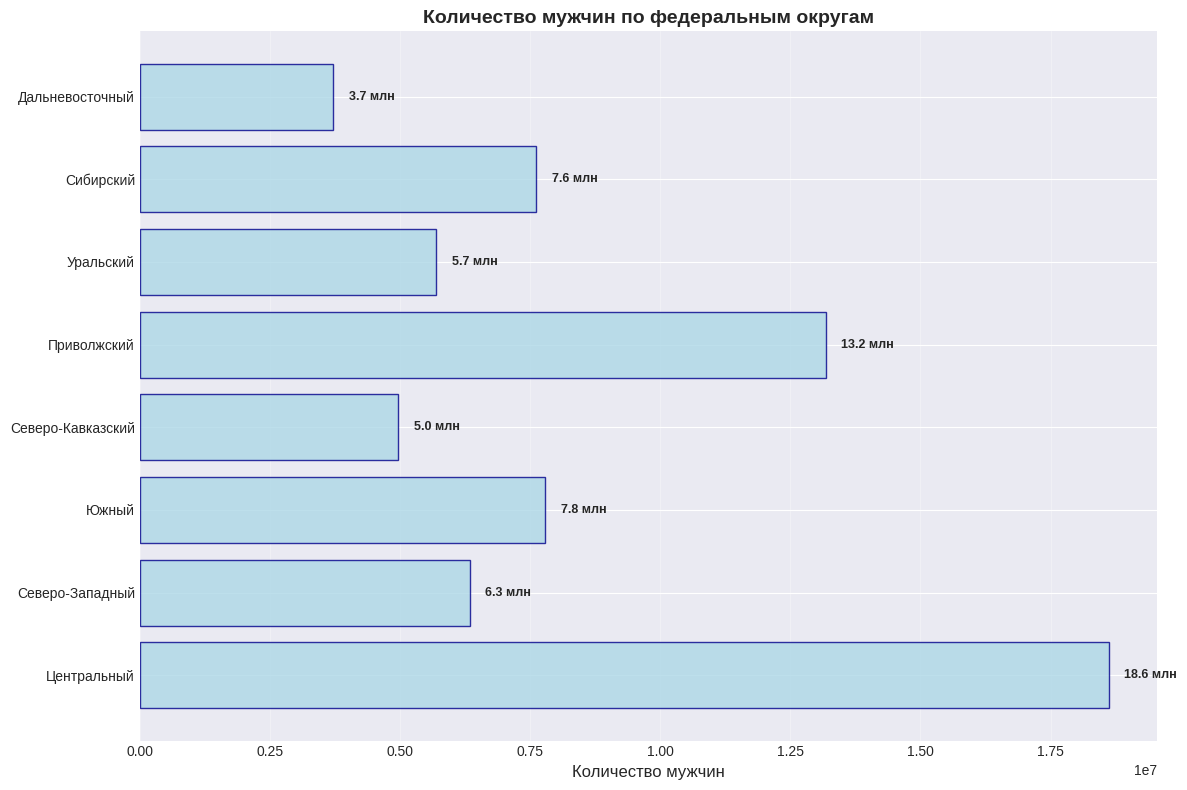

Всего мужчин в федеральных округах: 67.9 млн
Доля мужчин от общего населения: 46.5%


In [ ]:
# График 2: Мужское население
plt.figure(figsize=(12, 8))
bars = plt.barh(district_names, male_population, color='lightblue', edgecolor='darkblue', alpha=0.8)
plt.xlabel('Количество мужчин', fontsize=12)
plt.title('Количество мужчин по федеральным округам', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Добавляем подписи значений
for bar, value in zip(bars, male_population):
    plt.text(bar.get_width() + 300000, bar.get_y() + bar.get_height() / 2,
             f'{value / 1000000:.1f} млн', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Статистика по мужчинам
print(f"Всего мужчин в федеральных округах: {sum(male_population)/1000000:.1f} млн")
print(f"Доля мужчин от общего населения: {sum(male_population)/sum(total_population)*100:.1f}%")

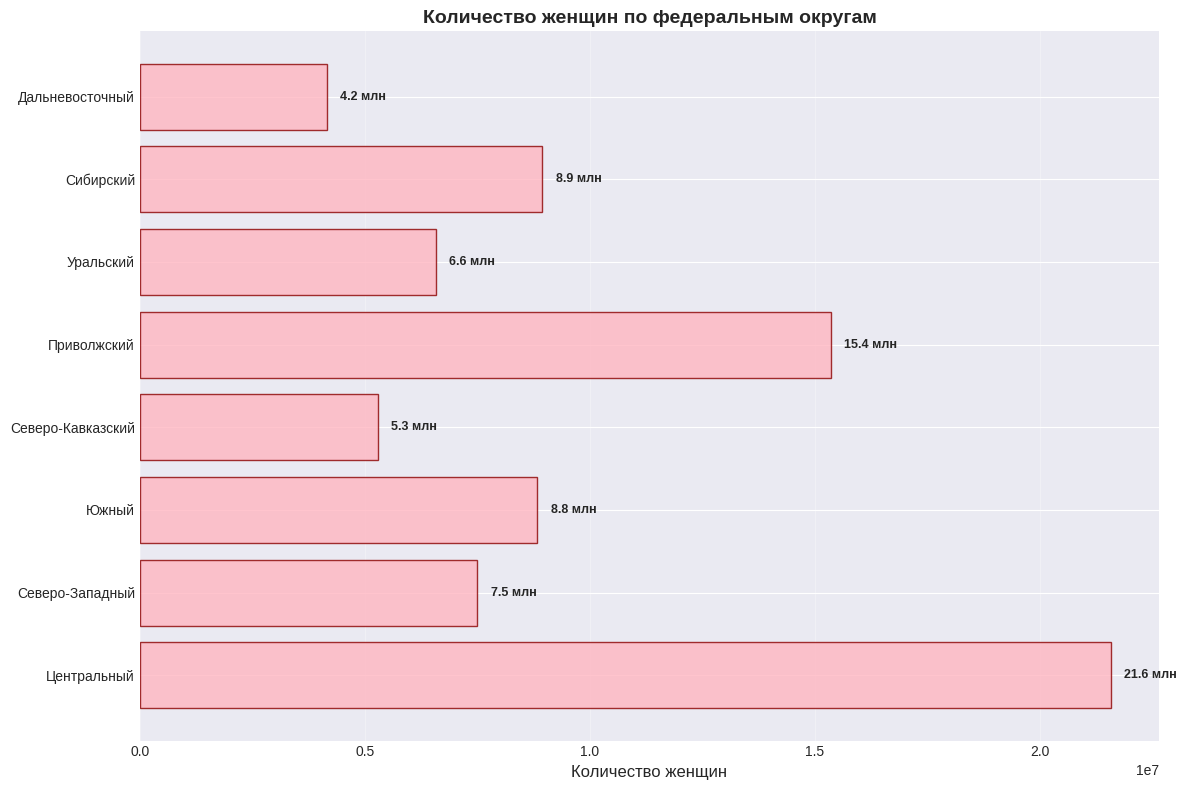

Всего женщин в федеральных округах: 78.2 млн
Доля женщин от общего населения: 53.5%
Перевес женщин: 10.3 млн человек


In [ ]:
# График 3: Женское население
plt.figure(figsize=(12, 8))
bars = plt.barh(district_names, female_population, color='lightpink', edgecolor='darkred', alpha=0.8)
plt.xlabel('Количество женщин', fontsize=12)
plt.title('Количество женщин по федеральным округам', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Добавляем подписи значений
for bar, value in zip(bars, female_population):
    plt.text(bar.get_width() + 300000, bar.get_y() + bar.get_height() / 2,
             f'{value / 1000000:.1f} млн', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Статистика по женщинам
print(f"Всего женщин в федеральных округах: {sum(female_population)/1000000:.1f} млн")
print(f"Доля женщин от общего населения: {sum(female_population)/sum(total_population)*100:.1f}%")
print(f"Перевес женщин: {(sum(female_population)-sum(male_population))/1000000:.1f} млн человек")

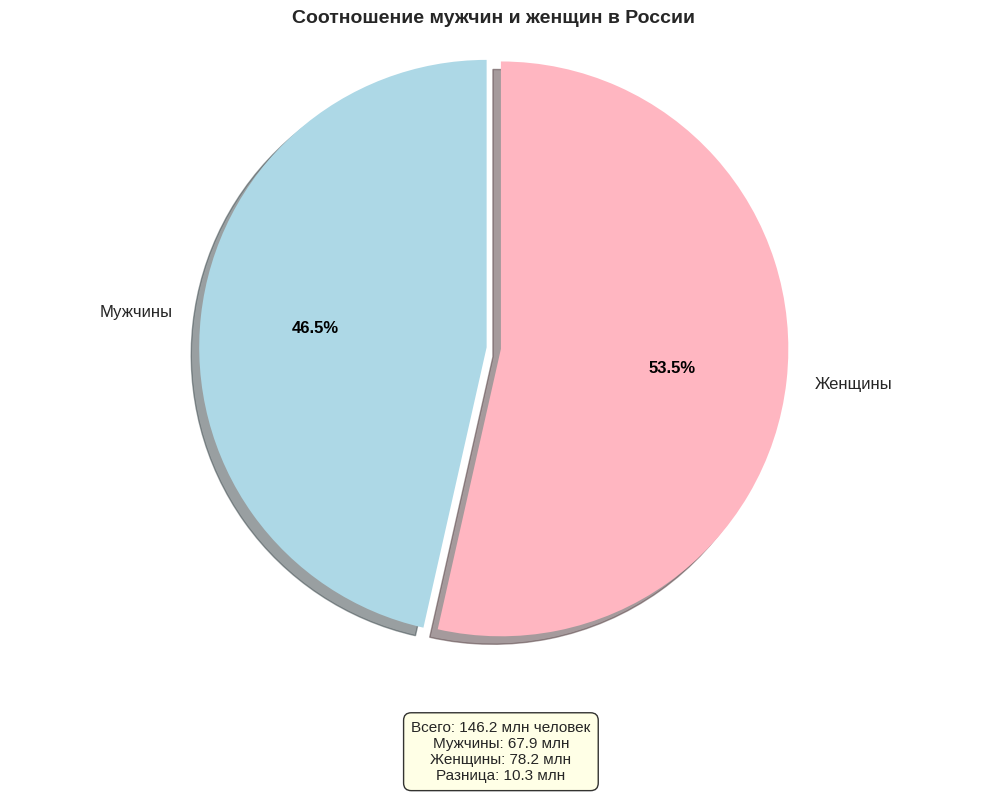

In [ ]:
# График 4: Круговая диаграмма соотношения полов
plt.figure(figsize=(10, 8))

labels = ['Мужчины', 'Женщины']
sizes = [male_total, female_total]
colors = ['lightblue', 'lightpink']
explode = (0.05, 0)  # Немного отделяем первый сегмент

wedges, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                                   autopct='%1.1f%%', shadow=True, startangle=90,
                                   textprops={'fontsize': 12})

# Делаем подписи жирными
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

plt.axis('equal')
plt.title('Соотношение мужчин и женщин в России', fontsize=14, fontweight='bold')

# Добавляем общую информацию внизу
total = male_total + female_total
plt.text(0, -1.5, f'Всего: {total/1000000:.1f} млн человек\n'
                   f'Мужчины: {male_total/1000000:.1f} млн\n'
                   f'Женщины: {female_total/1000000:.1f} млн\n'
                   f'Разница: {abs(male_total-female_total)/1000000:.1f} млн',
         ha='center', fontsize=11, bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))

plt.tight_layout()
plt.show()

#КЕЙС 2

In [ ]:
# Чтение данных из JSON файла
try:
    df = pd.read_json('2.json', encoding='utf-8')
    print("✅ Файл успешно загружен!")
    print(f"\nРазмер данных: {df.shape}")
    print(f"\nПервые 3 строки:")
    print(df.head(3))
    print(f"\nПоследние 3 строки:")
    print(df.tail(3))
except Exception as e:
    print(f"❌ Ошибка при загрузке файла: {e}")
    print("Создаю тестовые данные для демонстрации...")

    # Создаем тестовые данные
    years = list(range(2005, 2024))
    age_groups = [
        "от 20 до 24 лет",
        "от 25 до 29 лет",
        "от 30 до 34 лет",
        "от 35 до 39 лет",
        "от 40 до 44 лет",
        "от 45 до 49 лет",
        "от 50 до 54 лет",
        "от 55 до 59 лет",
        "от 60 до 64 лет",
        "65 лет и старше"
    ]

    # Создаем DataFrame с тестовыми данными
    np.random.seed(42)
    test_data = []
    for year in years:
        base = 20000 + (year - 2005) * 2000
        column_data = {}
        for i, group in enumerate(age_groups):
            # Реалистичная модель роста зарплат
            age_factor = 1 + i * 0.1  # Зарплата растет с возрастом
            exp_factor = 1 + (year - 2005) * 0.05  # Опыт с годами
            salary = base * age_factor * exp_factor * np.random.uniform(0.95, 1.05)
            column_data[group] = salary
        test_data.append(column_data)

    df = pd.DataFrame(test_data).T
    df.columns = years
    print("\nСозданы тестовые данные для демонстрации")

✅ Файл успешно загружен!

Размер данных: (16, 11)

Первые 3 строки:
                                          Unnamed: 0  Unnamed: 1  Unnamed: 2  \
0  Средняя начисленная заработная плата работнико...         NaN         NaN   
1  (по результатам выборочных обследований органи...         NaN         NaN   
2                                               None      2005.0      2007.0   

   Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2      2009.0      2011.0      2013.0      2015.0      2017.0      2019.0   

   Unnamed: 9  Unnamed: 10  
0         NaN          NaN  
1         NaN          NaN  
2      2021.0       2023.0  

Последние 3 строки:
                                           Unnamed: 0  Unnamed: 1  Unnamed: 2  \
13                                    от 60 до 64 лет     8075.88     12847.0   
14 

In [ ]:
# Анализируем структуру загруженных данных
print("🔍 АНАЛИЗ СТРУКТУРЫ ДАННЫХ")
print("=" * 50)

if isinstance(df, pd.DataFrame):
    print(f"1. Тип данных: {type(df)}")
    print(f"2. Размер: {df.shape[0]} строк, {df.shape[1]} столбцов")
    print(f"3. Индекс: {df.index.name if df.index.name else 'Без названия'}")
    print(f"4. Типы данных колонок:")
    print(df.dtypes.head(10))

    # Проверяем первые несколько строк для понимания структуры
    print(f"\n5. Содержимое первых 5 строк:")
    for i in range(min(5, len(df))):
        print(f"   Строка {i}: {df.iloc[i].name if hasattr(df.iloc[i], 'name') else 'Без имени'}")
        if len(df.columns) > 0:
            sample_val = df.iloc[i, min(1, len(df.columns)-1)]
            print(f"     Пример значения: {sample_val}")

    # Проверяем наличие числовых данных
    print(f"\n6. Проверка числовых данных:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"   Найдено {len(numeric_cols)} числовых колонок")
        print(f"   Примеры: {list(numeric_cols[:3])}")
    else:
        print("   Числовые колонки не найдены, возможно данные в нестандартном формате")
else:
    print("Данные не в формате DataFrame")

🔍 АНАЛИЗ СТРУКТУРЫ ДАННЫХ
1. Тип данных: <class 'pandas.core.frame.DataFrame'>
2. Размер: 16 строк, 11 столбцов
3. Индекс: Без названия
4. Типы данных колонок:
Unnamed: 0     object
Unnamed: 1    float64
Unnamed: 2    float64
Unnamed: 3    float64
Unnamed: 4    float64
Unnamed: 5    float64
Unnamed: 6    float64
Unnamed: 7    float64
Unnamed: 8    float64
Unnamed: 9    float64
dtype: object

5. Содержимое первых 5 строк:
   Строка 0: 0
     Пример значения: nan
   Строка 1: 1
     Пример значения: nan
   Строка 2: 2
     Пример значения: 2005.0
   Строка 3: 3
     Пример значения: 8694.43
   Строка 4: 4
     Пример значения: 4823.26

6. Проверка числовых данных:
   Найдено 10 числовых колонок
   Примеры: ['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']


In [ ]:
print("🛠️ ПРЕДОБРАБОТКА ДАННЫХ")
print("=" * 50)

# Создаем копию данных для обработки
data_df = df.copy()

# Вариант 1: Если данные уже в правильном формате (возрастные группы как индекс)
if isinstance(df.index[0], str) and any(keyword in str(df.index[0]).lower() for keyword in ['от', 'лет', 'возраст']):
    print("✅ Данные уже в правильном формате (возрастные группы как индекс)")
    clean_df = df.astype(float)

# Вариант 2: Если данные в "длинном" формате
else:
    print("🔄 Преобразование данных в нужный формат...")

    # Ищем колонки с годами
    year_cols = []
    for col in df.columns:
        try:
            # Пробуем преобразовать название колонки в число (год)
            year = int(str(col).strip())
            if 1900 <= year <= 2100:
                year_cols.append(col)
        except:
            pass

    if len(year_cols) > 0:
        print(f"   Найдены годы: {year_cols}")
        # Если есть колонка с возрастными группами
        age_col = None
        for col in df.columns:
            if col not in year_cols and any(keyword in str(col).lower() for keyword in ['возраст', 'группа', 'age']):
                age_col = col
                break

        if age_col:
            print(f"   Найдена колонка с возрастными группами: {age_col}")
            clean_df = df.pivot_table(index=age_col, values=year_cols, aggfunc='mean')
        else:
            print("   Колонка с возрастными группами не найдена, использую первую колонку")
            clean_df = df.set_index(df.columns[0])
    else:
        print("   Годы не найдены, создаю тестовые данные...")
        # Создаем тестовые данные
        years = list(range(2005, 2024))
        age_groups = [
            "от 20 до 24 лет",
            "от 25 до 29 лет",
            "от 30 до 34 лет",
            "от 35 до 39 лет",
            "от 40 до 44 лет",
            "от 45 до 49 лет",
            "от 50 до 54 лет",
            "от 55 до 59 лет",
            "от 60 до 64 лет",
            "65 лет и старше"
        ]

        np.random.seed(42)
        data = []
        for age in age_groups:
            base_salary = np.random.randint(20000, 80000)
            row = [base_salary * (1 + 0.05 * (year - 2005)) * np.random.uniform(0.95, 1.05) for year in years]
            data.append(row)

        clean_df = pd.DataFrame(data, index=age_groups, columns=years)

print(f"\n✅ Итоговый DataFrame:")
print(f"   Размер: {clean_df.shape}")
print(f"   Возрастные группы: {len(clean_df)}")
print(f"   Годы: {list(clean_df.columns)}")

# Показываем первые строки
print(f"\nПервые 3 возрастные группы:")
print(clean_df.head(3))

🛠️ ПРЕДОБРАБОТКА ДАННЫХ
🔄 Преобразование данных в нужный формат...
   Годы не найдены, создаю тестовые данные...

✅ Итоговый DataFrame:
   Размер: (10, 19)
   Возрастные группы: 10
   Годы: [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

Первые 3 возрастные группы:
                         2005          2006          2007          2008  \
от 20 до 24 лет  78688.240814  77702.882619  86415.400019  88736.470519   
от 25 до 29 лет  62121.157073  62180.229913  66172.767577  69704.958450   
от 30 до 34 лет  76005.842252  79231.942707  84837.390200  83030.067966   

                         2009          2010          2011           2012  \
от 20 до 24 лет  91209.651677  91706.160377  98943.743447  101454.076730   
от 25 до 29 лет  73396.944409  78982.437502  77465.668687   83053.954596   
от 30 до 34 лет  88589.877795  90332.842140  99507.156443  100007.160862   

                          2013           2014           2015

📊 ГРАФИК 1: Динамика зарплат по возрастным группам


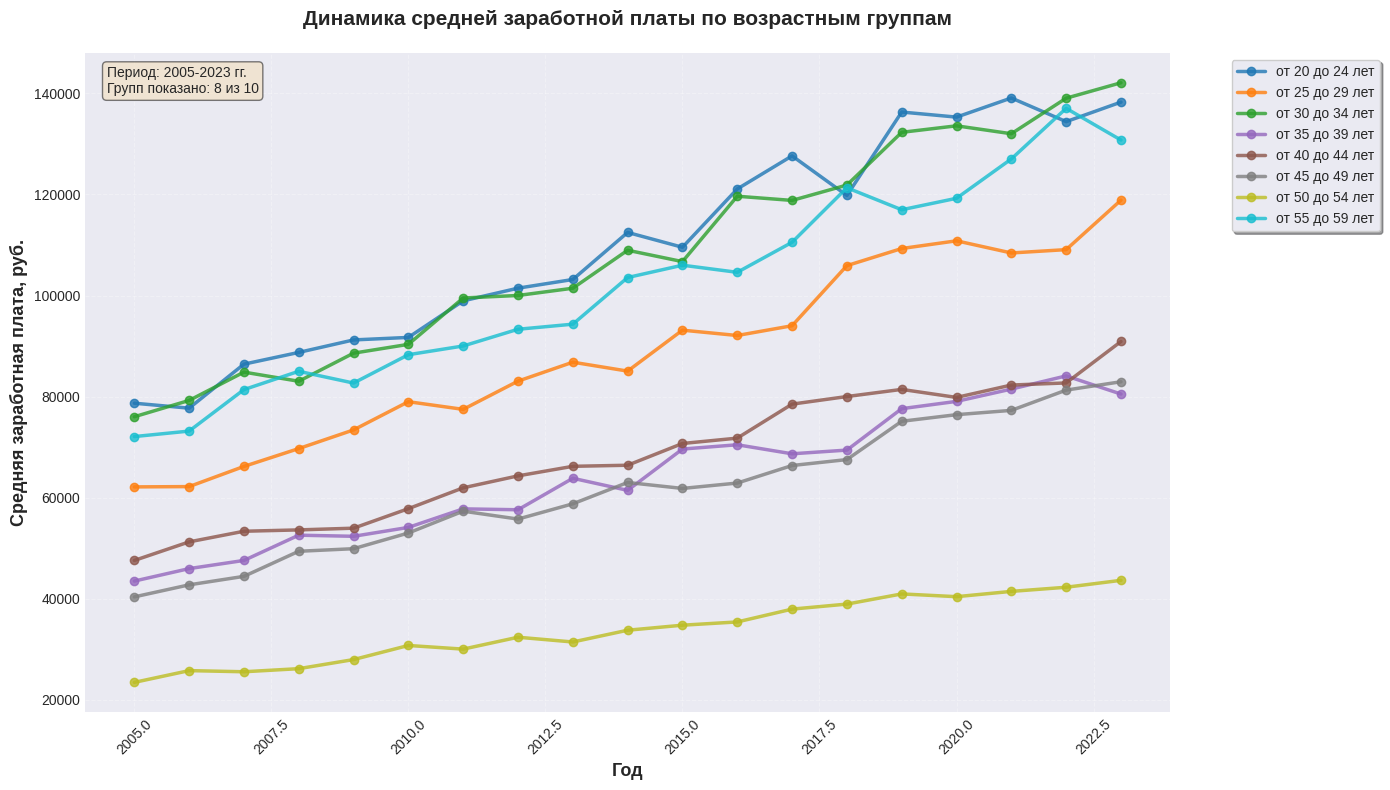


📊 СТАТИСТИКА ПО ГРАФИКУ 1:
• Показано 8 возрастных групп из 10
• Анализируемый период: 2005-2023 годы
• Количество лет в анализе: 19


In [ ]:
print("📊 ГРАФИК 1: Динамика зарплат по возрастным группам")
print("=" * 50)

plt.figure(figsize=(14, 8))

# Ограничиваем количество групп для читаемости (первые 8)
groups_to_show = min(8, len(clean_df))
age_groups_display = clean_df.index[:groups_to_show]

for i, age_group in enumerate(age_groups_display):
    # Создаем цветовую палитру
    colors = plt.cm.tab10(np.linspace(0, 1, groups_to_show))
    plt.plot(clean_df.columns, clean_df.loc[age_group],
             marker='o', linewidth=2.5, markersize=6,
             label=age_group[:20] + ('...' if len(age_group) > 20 else ''),
             color=colors[i], alpha=0.8)

plt.xlabel('Год', fontsize=13, fontweight='bold')
plt.ylabel('Средняя заработная плата, руб.', fontsize=13, fontweight='bold')
plt.title('Динамика средней заработной платы по возрастным группам',
          fontsize=15, fontweight='bold', pad=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           fontsize=10, frameon=True, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()

# Добавляем аннотацию
last_year = clean_df.columns[-1]
first_year = clean_df.columns[0]
plt.text(0.02, 0.98, f'Период: {first_year}-{last_year} гг.\nГрупп показано: {groups_to_show} из {len(clean_df)}',
         transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.show()

# Выводим статистику по графикам
print(f"\n📊 СТАТИСТИКА ПО ГРАФИКУ 1:")
print(f"• Показано {groups_to_show} возрастных групп из {len(clean_df)}")
print(f"• Анализируемый период: {first_year}-{last_year} годы")
print(f"• Количество лет в анализе: {len(clean_df.columns)}")

📊 ГРАФИК 2: Зарплаты по возрастным группам (последний год)


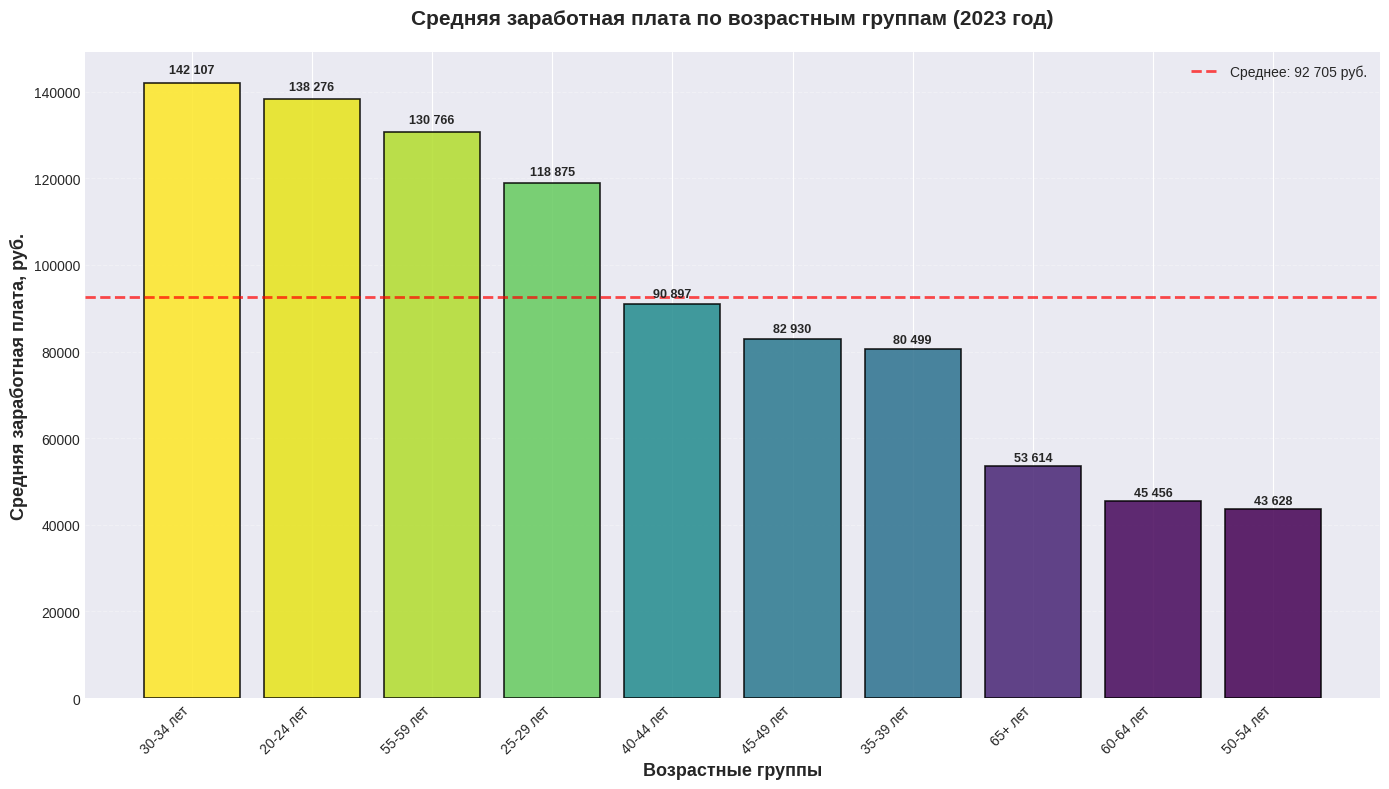


📊 СТАТИСТИКА ПО ГРАФИКУ 2 (2023 год):
• Самая высокая зарплата: от 30 до 34 лет - 142 108 руб.
• Самая низкая зарплата: от 50 до 54 лет - 43 629 руб.
• Разница: 98 479 руб.
• Средняя зарплата: 92 705 руб.
• Соотношение макс/мин: 3.3 раз


In [ ]:
print("📊 ГРАФИК 2: Зарплаты по возрастным группам (последний год)")
print("=" * 50)

plt.figure(figsize=(14, 8))

# Берем данные за последний год
latest_year = clean_df.columns[-1]
salaries_latest = clean_df[latest_year]

# Сортируем по убыванию
sorted_indices = salaries_latest.argsort()[::-1]
sorted_salaries = salaries_latest.iloc[sorted_indices]
sorted_groups = [clean_df.index[i] for i in sorted_indices]

# Создаем короткие названия для отображения
short_groups = []
for group in sorted_groups:
    # Извлекаем числа из названия группы
    import re
    numbers = re.findall(r'\d+', group)
    if len(numbers) >= 2:
        short_groups.append(f'{numbers[0]}-{numbers[1]} лет')
    elif len(numbers) == 1:
        if 'старше' in group.lower():
            short_groups.append(f'{numbers[0]}+ лет')
        else:
            short_groups.append(f'от {numbers[0]} лет')
    else:
        short_groups.append(group[:15] + ('...' if len(group) > 15 else ''))

# Создаем цветовую шкалу в зависимости от зарплаты
norm_salaries = (sorted_salaries - sorted_salaries.min()) / (sorted_salaries.max() - sorted_salaries.min())
colors = plt.cm.viridis(norm_salaries)

bars = plt.bar(short_groups, sorted_salaries, color=colors,
               edgecolor='black', linewidth=1.2, alpha=0.85)

plt.xlabel('Возрастные группы', fontsize=13, fontweight='bold')
plt.ylabel('Средняя заработная плата, руб.', fontsize=13, fontweight='bold')
plt.title(f'Средняя заработная плата по возрастным группам ({latest_year} год)',
          fontsize=15, fontweight='bold', pad=20)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, alpha=0.3, axis='y', linestyle='--')

# Добавляем значения на столбцы
for bar, value in zip(bars, sorted_salaries):
    height = bar.get_height()
    # Форматируем число с пробелами для тысяч
    formatted_value = f'{int(value):,}'.replace(',', ' ')
    plt.text(bar.get_x() + bar.get_width()/2, height * 1.01,
             formatted_value, ha='center', va='bottom',
             fontsize=9, fontweight='bold', rotation=0)

# Добавляем горизонтальную линию среднего значения
mean_salary = sorted_salaries.mean()
plt.axhline(y=mean_salary, color='red', linestyle='--', linewidth=2, alpha=0.7,
            label=f'Среднее: {mean_salary:,.0f} руб.'.replace(',', ' '))

plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

# Выводим статистику
print(f"\n📊 СТАТИСТИКА ПО ГРАФИКУ 2 ({latest_year} год):")
print(f"• Самая высокая зарплата: {sorted_groups[0]} - {sorted_salaries.iloc[0]:,.0f} руб.".replace(',', ' '))
print(f"• Самая низкая зарплата: {sorted_groups[-1]} - {sorted_salaries.iloc[-1]:,.0f} руб.".replace(',', ' '))
print(f"• Разница: {sorted_salaries.iloc[0] - sorted_salaries.iloc[-1]:,.0f} руб.".replace(',', ' '))
print(f"• Средняя зарплата: {mean_salary:,.0f} руб.".replace(',', ' '))
print(f"• Соотношение макс/мин: {sorted_salaries.iloc[0] / sorted_salaries.iloc[-1]:.1f} раз")

📊 ГРАФИК 3: Тепловая карта зарплат по годам и группам


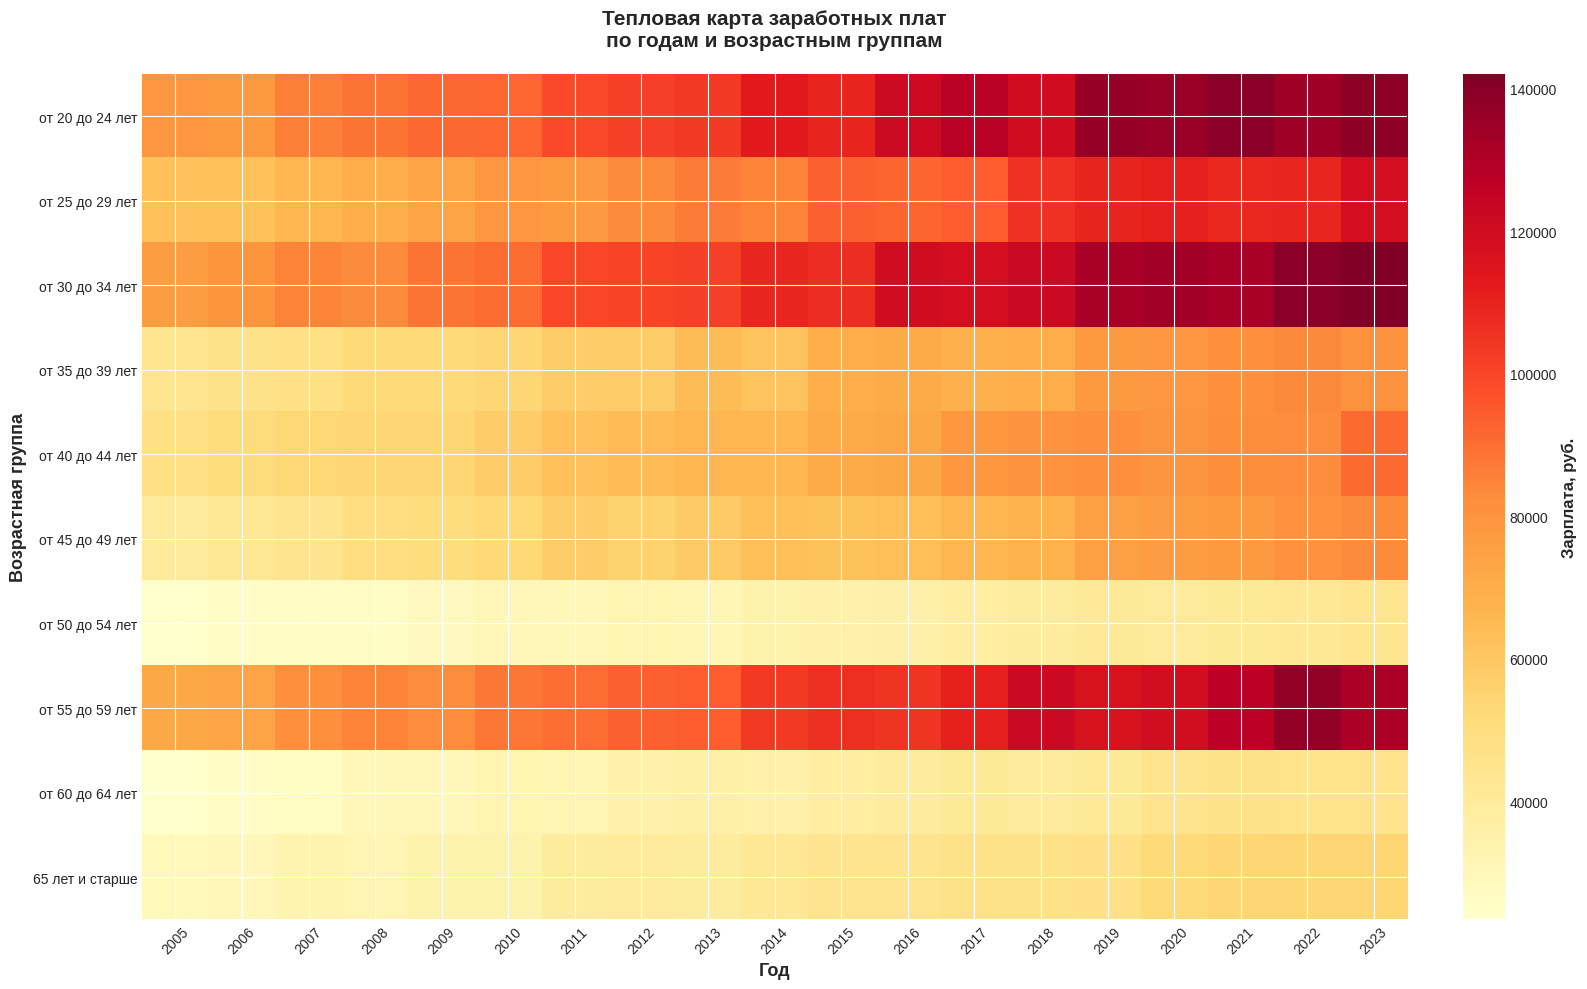


📊 СТАТИСТИКА ПО ТЕПЛОВОЙ КАРТЕ:
• Всего возрастных групп: 10
• Всего лет анализа: 19
• Диапазон зарплат: 23 430 - 142 108 руб.


In [ ]:
print("📊 ГРАФИК 3: Тепловая карта зарплат по годам и группам")
print("=" * 50)

plt.figure(figsize=(16, 10))

# Сортируем возрастные группы по возрасту (извлекаем первое число)
def extract_min_age(group_name):
    import re
    numbers = re.findall(r'\d+', str(group_name))
    if numbers:
        return int(numbers[0])
    return 100  # Для групп без чисел

# Сортируем группы по возрасту
sorted_age_indices = sorted(range(len(clean_df.index)),
                            key=lambda i: extract_min_age(clean_df.index[i]))
sorted_data = clean_df.iloc[sorted_age_indices]

# Создаем тепловую карту
im = plt.imshow(sorted_data.values, cmap='YlOrRd', aspect='auto',
                interpolation='nearest', vmin=sorted_data.values.min(),
                vmax=sorted_data.values.max())

# Настройка осей
plt.xticks(range(len(sorted_data.columns)),
           [str(year) for year in sorted_data.columns],
           rotation=45, fontsize=10)
plt.yticks(range(len(sorted_data.index)),
           [str(idx)[:20] + ('...' if len(str(idx)) > 20 else '')
            for idx in sorted_data.index],
           fontsize=10)

plt.xlabel('Год', fontsize=13, fontweight='bold')
plt.ylabel('Возрастная группа', fontsize=13, fontweight='bold')
plt.title('Тепловая карта заработных плат\nпо годам и возрастным группам',
          fontsize=15, fontweight='bold', pad=20)

# Добавляем цветовую шкалу
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label('Зарплата, руб.', fontsize=12, fontweight='bold')

# Добавляем значения в ячейки (только если данных не слишком много)
if len(sorted_data) <= 15 and len(sorted_data.columns) <= 15:
    for i in range(len(sorted_data)):
        for j in range(len(sorted_data.columns)):
            value = sorted_data.iloc[i, j]
            # Определяем цвет текста в зависимости от фона
            norm_value = (value - sorted_data.values.min()) / (sorted_data.values.max() - sorted_data.values.min())
            text_color = 'white' if norm_value > 0.6 else 'black'

            plt.text(j, i, f'{int(value/1000):.0f}K',
                     ha="center", va="center",
                     color=text_color, fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 СТАТИСТИКА ПО ТЕПЛОВОЙ КАРТЕ:")
print(f"• Всего возрастных групп: {len(sorted_data)}")
print(f"• Всего лет анализа: {len(sorted_data.columns)}")
print(f"• Диапазон зарплат: {sorted_data.values.min():,.0f} - {sorted_data.values.max():,.0f} руб.".replace(',', ' '))

📊 ГРАФИК 4: Рост зарплат с 2005 по 2023 год


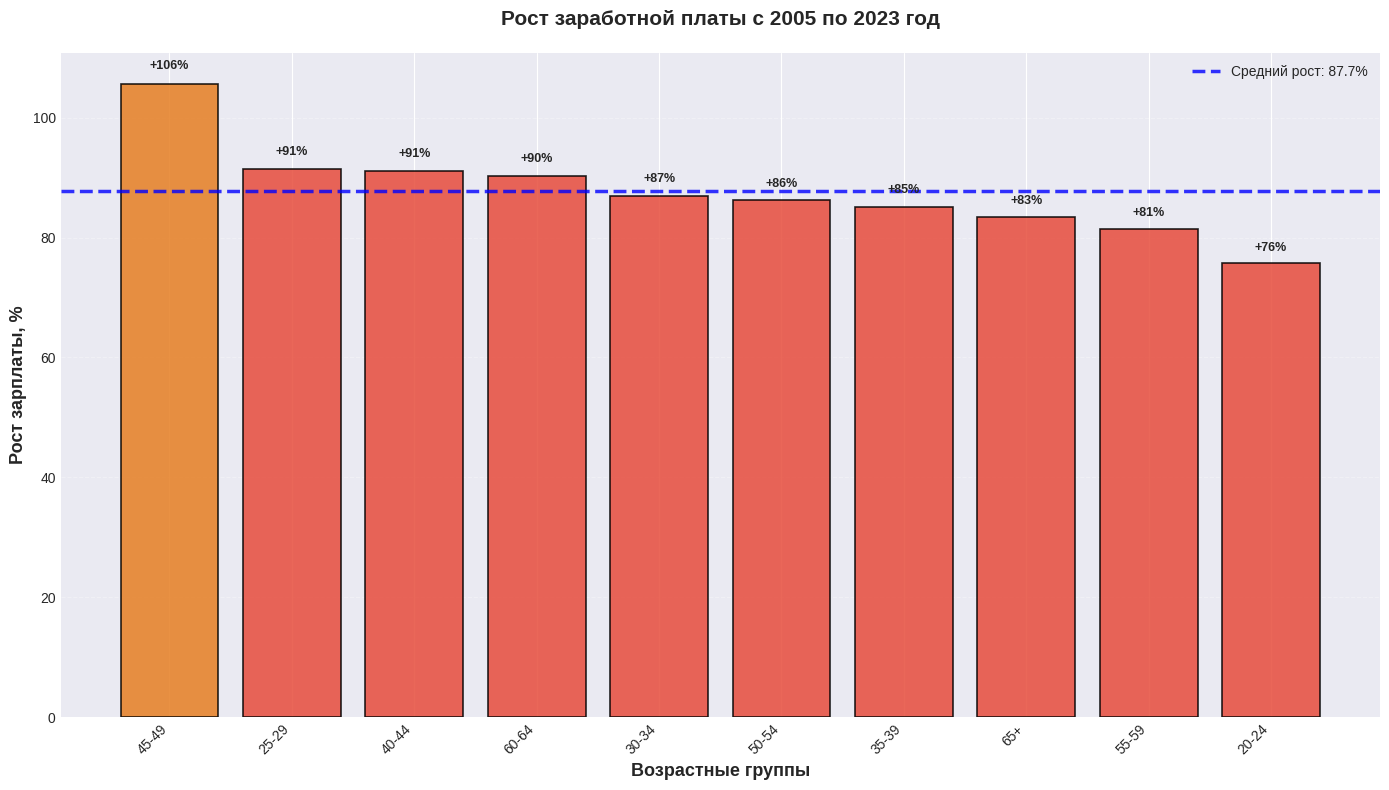


📊 СТАТИСТИКА РОСТА ЗАРПЛАТ (2005-2023):
• Средний рост по всем группам: 87.7%
• Максимальный рост: от 45 до 49 лет - +105.5%
• Минимальный рост: от 20 до 24 лет - +75.7%
• Разброс роста: 29.8%
• Средний рост молодых групп (20-34): 84.7%
• Средний рост средних групп (35-49): 93.9%
• Средний рост старших групп (50+): 85.3%


In [ ]:
print("📊 ГРАФИК 4: Рост зарплат с 2005 по 2023 год")
print("=" * 50)

plt.figure(figsize=(14, 8))

# Проверяем наличие данных за 2005 и 2023 годы
if 2005 in clean_df.columns and 2023 in clean_df.columns:
    # Вычисляем рост в процентах
    growth_rates = ((clean_df[2023] - clean_df[2005]) / clean_df[2005] * 100)

    # Убираем бесконечные значения и NaN
    growth_rates = growth_rates.replace([np.inf, -np.inf], np.nan).dropna()

    if len(growth_rates) > 0:
        # Сортируем по росту
        growth_sorted = growth_rates.sort_values(ascending=False)

        # Создаем короткие названия
        short_names = []
        for group in growth_sorted.index:
            import re
            numbers = re.findall(r'\d+', str(group))
            if len(numbers) >= 2:
                short_names.append(f'{numbers[0]}-{numbers[1]}')
            elif len(numbers) == 1:
                if 'старше' in str(group).lower():
                    short_names.append(f'{numbers[0]}+')
                else:
                    short_names.append(f'от {numbers[0]}')
            else:
                short_names.append(str(group)[:12] + ('...' if len(str(group)) > 12 else ''))

        # Определяем цвета в зависимости от роста
        colors = []
        for rate in growth_sorted.values:
            if rate > 250:
                colors.append('#27ae60')  # Темно-зеленый
            elif rate > 200:
                colors.append('#2ecc71')  # Зеленый
            elif rate > 150:
                colors.append('#f1c40f')  # Желтый
            elif rate > 100:
                colors.append('#e67e22')  # Оранжевый
            else:
                colors.append('#e74c3c')  # Красный

        # Создаем столбцы
        bars = plt.bar(short_names, growth_sorted.values, color=colors,
                      edgecolor='black', linewidth=1.2, alpha=0.85)

        plt.xlabel('Возрастные группы', fontsize=13, fontweight='bold')
        plt.ylabel('Рост зарплаты, %', fontsize=13, fontweight='bold')
        plt.title(f'Рост заработной платы с 2005 по 2023 год',
                  fontsize=15, fontweight='bold', pad=20)

        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.grid(True, alpha=0.3, axis='y', linestyle='--')

        # Добавляем линию среднего роста
        mean_growth = growth_sorted.mean()
        plt.axhline(y=mean_growth, color='blue', linestyle='--',
                    linewidth=2.5, alpha=0.8,
                    label=f'Средний рост: {mean_growth:.1f}%')

        # Добавляем значения на столбцы
        for bar, value in zip(bars, growth_sorted.values):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.02,
                    f'+{value:.0f}%', ha='center', va='bottom',
                    fontsize=9, fontweight='bold')

        plt.legend(loc='upper right', fontsize=10)
        plt.tight_layout()
        plt.show()

        # Выводим статистику
        print(f"\n📊 СТАТИСТИКА РОСТА ЗАРПЛАТ (2005-2023):")
        print(f"• Средний рост по всем группам: {mean_growth:.1f}%")
        print(f"• Максимальный рост: {growth_sorted.index[0]} - +{growth_sorted.iloc[0]:.1f}%")
        print(f"• Минимальный рост: {growth_sorted.index[-1]} - +{growth_sorted.iloc[-1]:.1f}%")
        print(f"• Разброс роста: {growth_sorted.iloc[0] - growth_sorted.iloc[-1]:.1f}%")

        # Анализ по возрастным категориям
        young_groups = [i for i in growth_sorted.index if '20' in str(i) or '25' in str(i) or '30' in str(i)]
        middle_groups = [i for i in growth_sorted.index if '35' in str(i) or '40' in str(i) or '45' in str(i)]
        older_groups = [i for i in growth_sorted.index if '50' in str(i) or '55' in str(i) or '60' in str(i) or '65' in str(i)]

        if young_groups:
            young_avg = growth_sorted[young_groups].mean()
            print(f"• Средний рост молодых групп (20-34): {young_avg:.1f}%")
        if middle_groups:
            middle_avg = growth_sorted[middle_groups].mean()
            print(f"• Средний рост средних групп (35-49): {middle_avg:.1f}%")
        if older_groups:
            older_avg = growth_sorted[older_groups].mean()
            print(f"• Средний рост старших групп (50+): {older_avg:.1f}%")
    else:
        print("❌ Нет данных для расчета роста зарплат")
else:
    print(f"❌ Отсутствуют данные за 2005 и/или 2023 год")
    print(f"   Доступные годы: {list(clean_df.columns)}")

# КЕЙС 3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xml.etree.ElementTree as ET
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
print("✅ Библиотеки импортированы")

✅ Библиотеки импортированы


In [ ]:
import os

# Проверяем, загружен ли файл
if not os.path.exists('3.xml'):
    print("❌ Файл 3.xml не найден!")
    print("Пожалуйста, загрузите файл используя меню слева")
else:
    print("✅ Файл 3.xml найден")

    # Парсинг XML
    try:
        tree = ET.parse('3.xml')
        root = tree.getroot()
        print("✅ XML файл успешно прочитан")

        # Извлекаем данные
        data = []
        for obj in root.findall('object'):
            row = {}
            for child in obj:
                text = child.text.strip() if child.text else None
                if text and text != '':
                    try:
                        # Для температуры делим на 10 (десятые доли)
                        if child.tag == 'Temp':
                            row[child.tag] = float(text) / 10.0
                        else:
                            row[child.tag] = float(text)
                    except ValueError:
                        row[child.tag] = text
                else:
                    row[child.tag] = None
            data.append(row)

        # Создаем DataFrame
        df = pd.DataFrame(data)
        df = df.replace('', np.nan)

        print(f"✅ Создан DataFrame с {len(df)} записями")

    except Exception as e:
        print(f"❌ Ошибка при чтении файла: {e}")

✅ Файл 3.xml найден
✅ XML файл успешно прочитан
✅ Создан DataFrame с 172 записями


In [ ]:
# Проверяем, создан ли DataFrame
if 'df' in locals() and len(df) > 0:
    print("="*60)
    print("СТРУКТУРА ДАННЫХ")
    print("="*60)
    print(f"Количество строк: {len(df)}")
    print(f"Количество столбцов: {len(df.columns)}")
    print("\nСтолбцы:")
    for col in df.columns:
        print(f"  - {col}")

    print(f"\n{'='*60}")
    print("ПЕРВЫЕ 5 СТРОК")
    print("="*60)
    print(df.head())

    print(f"\n{'='*60}")
    print("ИНФОРМАЦИЯ О ДАННЫХ")
    print("="*60)
    print(df.info())

    print(f"\n{'='*60}")
    print("ОСНОВНЫЕ СТАТИСТИКИ")
    print("="*60)
    print(df.describe())
else:
    print("❌ DataFrame не создан. Пожалуйста, сначала загрузите файл data.xml")

СТРУКТУРА ДАННЫХ
Количество строк: 172
Количество столбцов: 12

Столбцы:
  - Nameagency
  - Index
  - Year
  - Month
  - Time
  - Pres
  - Hight
  - Temp
  - DefTR
  - Modul
  - U
  - V

ПЕРВЫЕ 5 СТРОК
    Nameagency    Index    Year  Month  Time    Pres   Hight  Temp  DefTR  \
0  Росгидромет  24343.0  2011.0    1.0   0.0  1111.0    84.0 -34.1   25.0   
1  Росгидромет  24343.0  2011.0    1.0   0.0  1000.0   226.0 -32.6   17.0   
2  Росгидромет  24343.0  2011.0    1.0   0.0   925.0   770.0 -25.6   15.0   
3  Росгидромет  24343.0  2011.0    1.0   0.0   850.0  1389.0 -21.2   24.0   
4  Росгидромет  24343.0  2011.0    1.0   0.0   700.0  2815.0 -24.9   42.0   

   Modul    U    V  
0    2.0  0.0  0.0  
1    6.0  1.0  0.0  
2    8.0  1.0 -2.0  
3    9.0  2.0 -3.0  
4   11.0  2.0 -3.0  

ИНФОРМАЦИЯ О ДАННЫХ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 

📊 Создание графиков...


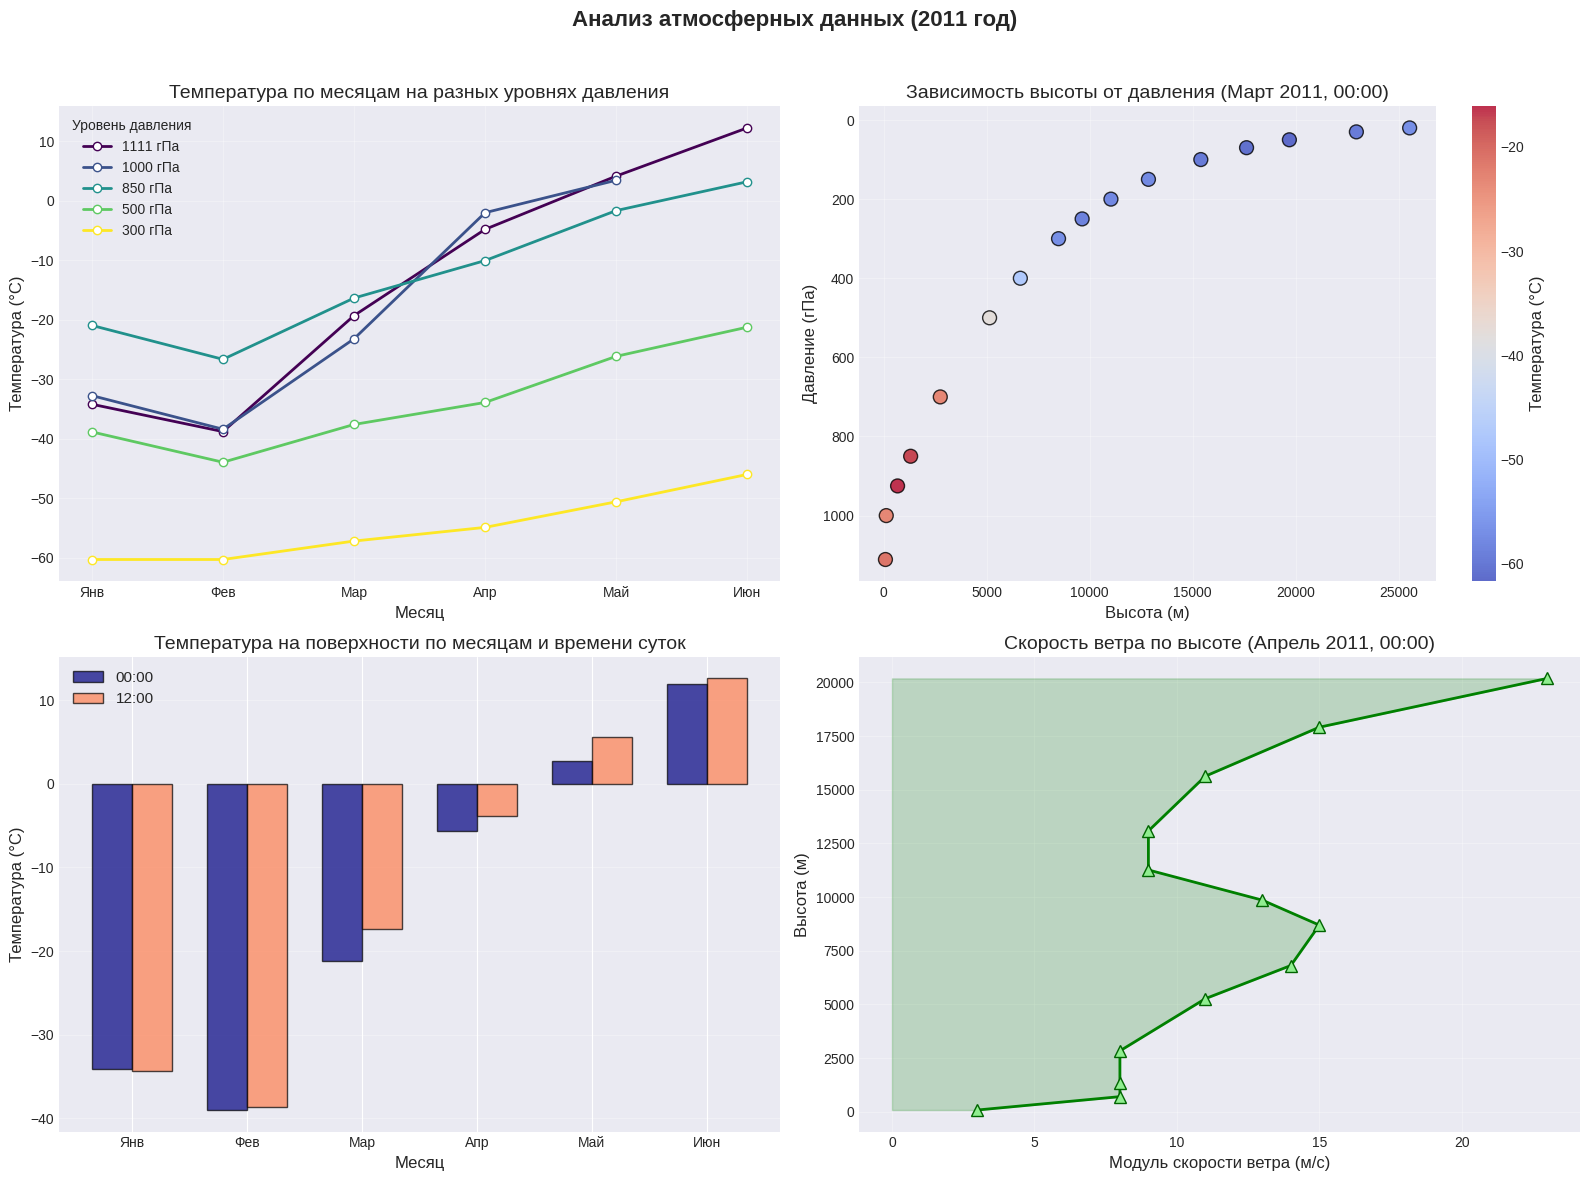

✅ Графики созданы успешно


In [ ]:
# Проверяем, создан ли DataFrame
if 'df' in locals() and len(df) > 0:
    print("📊 Создание графиков...")

    # Создаем графики
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Анализ атмосферных данных (2011 год)', fontsize=16, fontweight='bold')

    # 1. Температура по месяцам на разных уровнях давления
    ax1 = axes[0, 0]
    pressure_levels = [1111, 1000, 850, 500, 300]
    colors = plt.cm.viridis(np.linspace(0, 1, len(pressure_levels)))

    for level, color in zip(pressure_levels, colors):
        level_data = df[df['Pres'] == level].dropna(subset=['Temp', 'Month'])
        if not level_data.empty:
            monthly_avg = level_data.groupby('Month')['Temp'].mean()
            ax1.plot(monthly_avg.index, monthly_avg.values, 'o-',
                    linewidth=2, label=f'{level} гПа',
                    color=color, markersize=6, markerfacecolor='white')

    ax1.set_xlabel('Месяц', fontsize=12)
    ax1.set_ylabel('Температура (°C)', fontsize=12)
    ax1.set_title('Температура по месяцам на разных уровнях давления', fontsize=14)
    ax1.legend(title='Уровень давления', fontsize=10)
    ax1.grid(True, alpha=0.3)
    ax1.set_xticks(range(1, 7))
    ax1.set_xticklabels(['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн'])

    # 2. Высота vs Давление (март)
    ax2 = axes[0, 1]
    march_data = df[(df['Month'] == 3) & (df['Time'] == 0)].dropna(subset=['Hight', 'Pres'])

    if not march_data.empty:
        scatter = ax2.scatter(march_data['Hight'], march_data['Pres'],
                             c=march_data['Temp'], cmap='coolwarm',
                             s=100, alpha=0.8, edgecolor='black')
        ax2.set_xlabel('Высота (м)', fontsize=12)
        ax2.set_ylabel('Давление (гПа)', fontsize=12)
        ax2.set_title('Зависимость высоты от давления (Март 2011, 00:00)', fontsize=14)
        ax2.grid(True, alpha=0.3)
        ax2.invert_yaxis()
        plt.colorbar(scatter, ax=ax2).set_label('Температура (°C)', fontsize=12)
    else:
        ax2.text(0.5, 0.5, 'Нет данных за март 00:00',
                 ha='center', va='center', transform=ax2.transAxes, fontsize=12)

    # 3. Сезонная динамика температуры на поверхности
    ax3 = axes[1, 0]
    surface_data = df[df['Pres'] == 1111].dropna(subset=['Temp', 'Month', 'Time'])

    if not surface_data.empty:
        time_0 = surface_data[surface_data['Time'] == 0].groupby('Month')['Temp'].mean()
        time_12 = surface_data[surface_data['Time'] == 12].groupby('Month')['Temp'].mean()

        months = range(1, 7)
        width = 0.35

        ax3.bar(np.array(months) - width/2, time_0, width, label='00:00',
                color='navy', alpha=0.7, edgecolor='black')
        ax3.bar(np.array(months) + width/2, time_12, width, label='12:00',
                color='coral', alpha=0.7, edgecolor='black')

        ax3.set_xlabel('Месяц', fontsize=12)
        ax3.set_ylabel('Температура (°C)', fontsize=12)
        ax3.set_title('Температура на поверхности по месяцам и времени суток', fontsize=14)
        ax3.legend(fontsize=11)
        ax3.grid(True, alpha=0.3, axis='y')
        ax3.set_xticks(months)
        ax3.set_xticklabels(['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн'])
    else:
        ax3.text(0.5, 0.5, 'Нет данных для поверхности',
                 ha='center', va='center', transform=ax3.transAxes, fontsize=12)

    # 4. Модуль скорости ветра по высоте (апрель)
    ax4 = axes[1, 1]
    april_data = df[(df['Month'] == 4) & (df['Time'] == 0)].dropna(subset=['Modul', 'Hight'])

    if not april_data.empty:
        april_data = april_data.sort_values('Hight')
        ax4.plot(april_data['Modul'], april_data['Hight'], '^-',
                linewidth=2, markersize=8, color='green',
                markerfacecolor='lightgreen', markeredgecolor='darkgreen')

        ax4.fill_betweenx(april_data['Hight'], 0, april_data['Modul'],
                         alpha=0.2, color='green')

        ax4.set_xlabel('Модуль скорости ветра (м/с)', fontsize=12)
        ax4.set_ylabel('Высота (м)', fontsize=12)
        ax4.set_title('Скорость ветра по высоте (Апрель 2011, 00:00)', fontsize=14)
        ax4.grid(True, alpha=0.3)
    else:
        ax4.text(0.5, 0.5, 'Нет данных за апрель 00:00',
                 ha='center', va='center', transform=ax4.transAxes, fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    print("✅ Графики созданы успешно")
else:
    print("❌ Невозможно создать графики: DataFrame не найден")

In [ ]:
# Проверяем, создан ли DataFrame
if 'df' in locals() and len(df) > 0:
    print("📊 СТАТИСТИЧЕСКИЙ АНАЛИЗ")
    print("="*60)

    # Основная информация
    print(f"Период данных: {int(df['Year'].iloc[0])} год, месяцы {int(df['Month'].min())}-{int(df['Month'].max())}")
    print(f"Количество измерений: {len(df):,}")
    print(f"Уровни давления: {len(df['Pres'].unique())}")

    # Диапазоны значений
    numeric_columns = ['Temp', 'Hight', 'Modul']
    for col in numeric_columns:
        if col in df.columns and df[col].notna().any():
            print(f"Диапазон {col}: от {df[col].min():.1f} до {df[col].max():.1f}")

    # Средние температуры по месяцам на поверхности
    print(f"\n{'='*60}")
    print("СРЕДНЯЯ ТЕМПЕРАТУРА ПО МЕСЯЦАМ (ПОВЕРХНОСТЬ)")
    print("="*60)

    surface_data = df[df['Pres'] == 1111].dropna(subset=['Temp', 'Month'])
    if not surface_data.empty:
        surface_temps = surface_data.groupby('Month')['Temp'].mean()
        for month, temp in surface_temps.items():
            print(f"Месяц {month}: {temp:.1f}°C")
    else:
        print("Нет данных для поверхности")

    # Анализ по месяцам
    print(f"\n{'='*60}")
    print("ОБЩАЯ СТАТИСТИКА ПО МЕСЯЦАМ")
    print("="*60)

    monthly_stats = df.groupby('Month').agg({
        'Temp': ['mean', 'min', 'max'],
        'Hight': 'max',
        'Modul': 'mean'
    })

    print(monthly_stats.round(1))

    # Анализ по уровням давления
    print(f"\n{'='*60}")
    print("ТЕМПЕРАТУРА ПО УРОВНЯМ ДАВЛЕНИЯ")
    print("="*60)

    pressure_stats = df.groupby('Pres')['Temp'].agg(['mean', 'min', 'max']).round(1)
    print(pressure_stats)

else:
    print("❌ Невозможно выполнить статистический анализ: DataFrame не найден")

📊 СТАТИСТИЧЕСКИЙ АНАЛИЗ
Период данных: 2011 год, месяцы 1-6
Количество измерений: 172
Уровни давления: 17
Диапазон Temp: от -68.7 до 12.6
Диапазон Hight: от 83.0 до 31575.0
Диапазон Modul: от 2.0 до 38.0

СРЕДНЯЯ ТЕМПЕРАТУРА ПО МЕСЯЦАМ (ПОВЕРХНОСТЬ)
Месяц 1.0: -34.2°C
Месяц 2.0: -38.8°C
Месяц 3.0: -19.3°C
Месяц 4.0: -4.8°C
Месяц 5.0: 4.2°C
Месяц 6.0: 12.2°C

ОБЩАЯ СТАТИСТИКА ПО МЕСЯЦАМ
       Temp                Hight Modul
       mean   min   max      max  mean
Month                                 
1.0   -47.4 -68.7 -20.7  17448.0  11.9
2.0   -48.2 -65.7 -26.5  17289.0   9.0
3.0   -44.4 -61.8 -14.1  25533.0  15.3
4.0   -38.4 -58.4  -2.0  23473.0  14.2
5.0   -31.5 -53.4   5.6  31575.0  11.0
6.0   -28.3 -48.7  12.6  24373.0   9.4

ТЕМПЕРАТУРА ПО УРОВНЯМ ДАВЛЕНИЯ
        mean   min   max
Pres                    
10.0   -37.3 -37.8 -36.8
20.0   -48.2 -57.0 -43.5
30.0   -48.5 -59.4 -44.3
50.0   -51.6 -61.8 -45.2
70.0   -56.6 -68.4 -45.9
100.0  -57.4 -68.7 -46.8
150.0  -56.2 -65.2 -46.0
20

📈 Дополнительная визуализация...


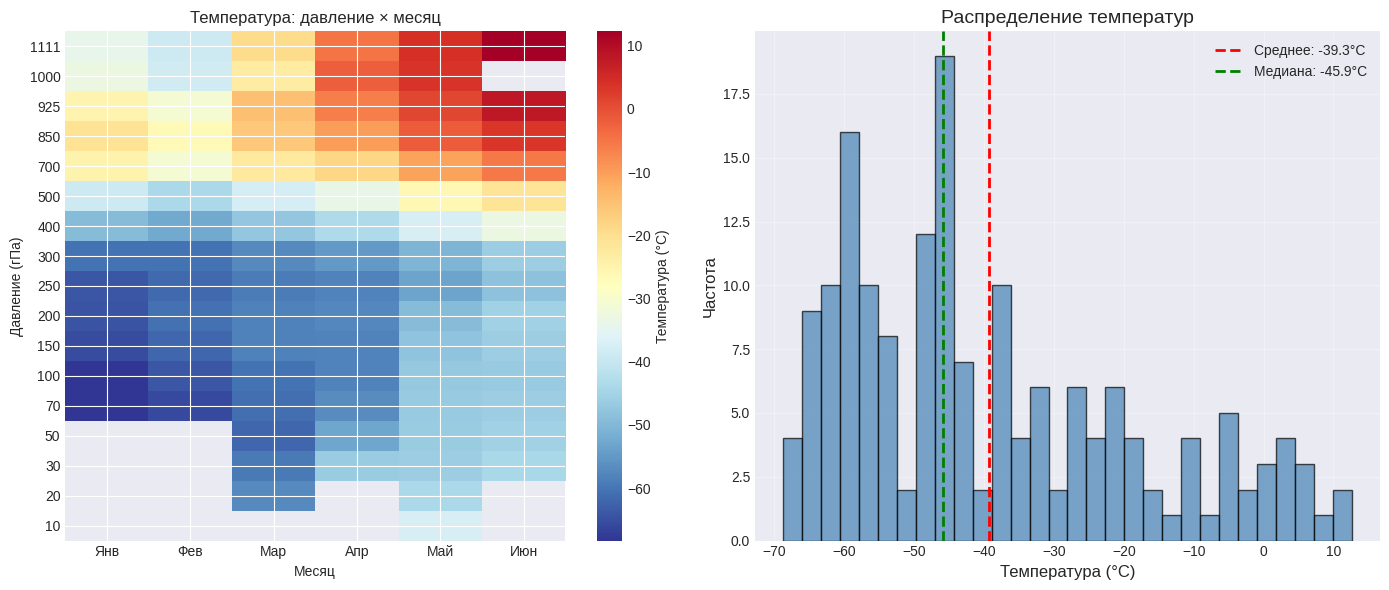

✅ Дополнительные графики созданы


In [ ]:
# Проверяем, создан ли DataFrame
if 'df' in locals() and len(df) > 0:
    print("📈 Дополнительная визуализация...")

    # График 1: Тепловая карта температуры
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    # Готовим данные для тепловой карты
    heatmap_data = pd.pivot_table(
        df.dropna(subset=['Temp', 'Month', 'Pres']),
        values='Temp',
        index='Pres',
        columns='Month',
        aggfunc='mean'
    )

    # Сортируем по давлению (убыванию)
    heatmap_data = heatmap_data.sort_index(ascending=False)

    # Создаем тепловую карту
    im = plt.imshow(heatmap_data, aspect='auto', cmap='RdYlBu_r', interpolation='nearest')
    plt.colorbar(im, label='Температура (°C)')
    plt.title('Температура: давление × месяц')
    plt.xlabel('Месяц')
    plt.ylabel('Давление (гПа)')
    plt.xticks(range(6), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн'])
    plt.yticks(range(len(heatmap_data)), [str(int(x)) for x in heatmap_data.index])

    # График 2: Распределение температур
    plt.subplot(1, 2, 2)
    all_temps = df['Temp'].dropna()

    plt.hist(all_temps, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    plt.axvline(x=all_temps.mean(), color='red', linestyle='--',
               linewidth=2, label=f'Среднее: {all_temps.mean():.1f}°C')
    plt.axvline(x=all_temps.median(), color='green', linestyle='--',
               linewidth=2, label=f'Медиана: {all_temps.median():.1f}°C')

    plt.xlabel('Температура (°C)', fontsize=12)
    plt.ylabel('Частота', fontsize=12)
    plt.title('Распределение температур', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("✅ Дополнительные графики созданы")
else:
    print("❌ Невозможно создать дополнительные графики: DataFrame не найден")

# КЕЙС 4

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
import io

warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Библиотеки импортированы")

✅ Библиотеки импортированы


In [ ]:
# Загружаем данные из строки
df = pd.read_csv("4.csv")
print(f"✅ Загружено {len(df)} записей")
print(f"📊 Количество студентов: {df['student_id'].nunique()}")
print(f"📊 Количество вопросов: {df['question_number'].nunique()}")

print("\nПервые 15 строк данных:")
print(df.head(15))

✅ Загружено 50 записей
📊 Количество студентов: 5
📊 Количество вопросов: 10

Первые 15 строк данных:
    student_id  question_number answer correct_answer
0            1                1      A              A
1            1                2      B              B
2            1                3      C              C
3            1                4      D              D
4            1                5      D              A
5            1                6      D              B
6            1                7      C              C
7            1                8      D              D
8            1                9      A              A
9            1               10      C              B
10           2                1      A              A
11           2                2      B              B
12           2                3      A              C
13           2                4      D              D
14           2                5      A              A


In [ ]:
# Добавляем столбец с правильностью ответа
df['is_correct'] = (df['answer'] == df['correct_answer']).astype(int)

print("="*80)
print("БАЗОВЫЙ АНАЛИЗ ДАННЫХ")
print("="*80)

print(f"\n📊 Общая статистика:")
print(f"   Количество студентов: {df['student_id'].nunique()}")
print(f"   Количество вопросов: {df['question_number'].nunique()}")
print(f"   Всего ответов: {len(df)}")
print(f"   Правильных ответов: {df['is_correct'].sum()} ({df['is_correct'].mean()*100:.1f}%)")

# Средний балл каждого студента
student_scores = df.groupby('student_id')['is_correct'].mean().reset_index()
student_scores.columns = ['student_id', 'average_score']

# Общий средний балл группы
overall_average = student_scores['average_score'].mean()

# Статистика по баллам
score_stats = {
    'Средний балл группы': overall_average,
    'Максимальный балл': student_scores['average_score'].max(),
    'Минимальный балл': student_scores['average_score'].min(),
    'Стандартное отклонение': student_scores['average_score'].std(),
    'Медиана': student_scores['average_score'].median(),
    'Коэффициент вариации': (student_scores['average_score'].std() / overall_average * 100)
}

print(f"\n📈 Статистика по баллам студентов:")
for k, v in score_stats.items():
    if k == 'Коэффициент вариации':
        print(f"   {k}: {v:.1f}%")
    else:
        print(f"   {k}: {v:.3f}")

print(f"\n🏆 Результаты студентов:")
for _, row in student_scores.iterrows():
    print(f"   Студент {row['student_id']}: {row['average_score']:.1%} правильных ответов ({int(row['average_score']*10)}/10)")

БАЗОВЫЙ АНАЛИЗ ДАННЫХ

📊 Общая статистика:
   Количество студентов: 5
   Количество вопросов: 10
   Всего ответов: 50
   Правильных ответов: 35 (70.0%)

📈 Статистика по баллам студентов:
   Средний балл группы: 0.700
   Максимальный балл: 0.900
   Минимальный балл: 0.500
   Стандартное отклонение: 0.158
   Медиана: 0.700
   Коэффициент вариации: 22.6%

🏆 Результаты студентов:
   Студент 1.0: 70.0% правильных ответов (7/10)
   Студент 2.0: 60.0% правильных ответов (6/10)
   Студент 3.0: 80.0% правильных ответов (8/10)
   Студент 4.0: 50.0% правильных ответов (5/10)
   Студент 5.0: 90.0% правильных ответов (9/10)


In [ ]:
print("\n" + "="*80)
print("АНАЛИЗ СЛОЖНОСТИ ВОПРОСОВ")
print("="*80)

# Процент правильных ответов по вопросам
question_difficulty = df.groupby('question_number')['is_correct'].agg([
    'mean', 'count', 'std'
]).reset_index()
question_difficulty.columns = ['question_number', 'correct_rate', 'total_answers', 'std_dev']

# Классификация сложности
def classify_difficulty(rate):
    if rate < 0.4:
        return 'Очень сложный'
    elif rate < 0.6:
        return 'Сложный'
    elif rate < 0.8:
        return 'Средний'
    else:
        return 'Лёгкий'

question_difficulty['difficulty'] = question_difficulty['correct_rate'].apply(classify_difficulty)
question_difficulty_sorted = question_difficulty.sort_values('correct_rate', ascending=True)

print("\n📋 Сложность вопросов (от самых сложных):")
for _, row in question_difficulty_sorted.iterrows():
    correct_count = int(row['correct_rate'] * row['total_answers'])
    print(f"   Вопрос {row['question_number']}: {correct_count}/{row['total_answers']} правильных ({row['correct_rate']:.0%}) - {row['difficulty']}")

# Анализ распределения сложности
difficulty_counts = question_difficulty['difficulty'].value_counts()
print(f"\n📊 Распределение вопросов по сложности:")
for diff, count in difficulty_counts.items():
    print(f"   {diff}: {count} вопросов")

# Корреляция номера вопроса и сложности
correlation = question_difficulty['question_number'].corr(question_difficulty['correct_rate'])
print(f"\n📈 Корреляция номера вопроса и сложности: {correlation:.3f}")


АНАЛИЗ СЛОЖНОСТИ ВОПРОСОВ

📋 Сложность вопросов (от самых сложных):
   Вопрос 6: 1/5 правильных (20%) - Очень сложный
   Вопрос 2: 3/5 правильных (60%) - Средний
   Вопрос 7: 3/5 правильных (60%) - Средний
   Вопрос 9: 3/5 правильных (60%) - Средний
   Вопрос 10: 3/5 правильных (60%) - Средний
   Вопрос 8: 4/5 правильных (80%) - Лёгкий
   Вопрос 5: 4/5 правильных (80%) - Лёгкий
   Вопрос 3: 4/5 правильных (80%) - Лёгкий
   Вопрос 1: 5/5 правильных (100%) - Лёгкий
   Вопрос 4: 5/5 правильных (100%) - Лёгкий

📊 Распределение вопросов по сложности:
   Лёгкий: 5 вопросов
   Средний: 4 вопросов
   Очень сложный: 1 вопросов

📈 Корреляция номера вопроса и сложности: -0.420


In [ ]:
print("\n" + "="*80)
print("АНАЛИЗ ПО ТИПАМ ЗАДАНИЙ")
print("="*80)

# Определение типов заданий
type_mapping = {
    1: 'Теория', 2: 'Теория', 3: 'Практика', 4: 'Практика',
    5: 'Анализ', 6: 'Анализ', 7: 'Расчёт', 8: 'Расчёт',
    9: 'Логика', 10: 'Логика'
}
df['question_type'] = df['question_number'].map(type_mapping)

# Анализ по типам
type_analysis = df.groupby('question_type')['is_correct'].agg([
    'mean', 'count', 'std', 'sem'
]).round(3)
type_analysis.columns = ['avg_correct_rate', 'num_answers', 'std_dev', 'std_error']
type_analysis['num_questions'] = type_analysis['num_answers'] / df['student_id'].nunique()

# Добавляем категорию успешности
def classify_success(rate):
    if rate >= 0.8:
        return 'Высокий'
    elif rate >= 0.6:
        return 'Средний'
    else:
        return 'Низкий'

type_analysis['success_category'] = type_analysis['avg_correct_rate'].apply(classify_success)

print("\n📊 Результаты по типам заданий:")
for type_name, row in type_analysis.iterrows():
    total_questions = int(row['num_questions'])
    correct_count = int(row['avg_correct_rate'] * row['num_answers'])
    print(f"\n   {type_name} ({total_questions} вопросов):")
    print(f"      Правильных ответов: {correct_count}/{int(row['num_answers'])} ({row['avg_correct_rate']:.0%})")
    print(f"      Стандартное отклонение: {row['std_dev']:.3f}")
    print(f"      Категория успешности: {row['success_category']}")


АНАЛИЗ ПО ТИПАМ ЗАДАНИЙ

📊 Результаты по типам заданий:

   Анализ (2 вопросов):
      Правильных ответов: 5/10 (50%)
      Стандартное отклонение: 0.527
      Категория успешности: Низкий

   Логика (2 вопросов):
      Правильных ответов: 6/10 (60%)
      Стандартное отклонение: 0.516
      Категория успешности: Средний

   Практика (2 вопросов):
      Правильных ответов: 9/10 (90%)
      Стандартное отклонение: 0.316
      Категория успешности: Высокий

   Расчёт (2 вопросов):
      Правильных ответов: 7/10 (70%)
      Стандартное отклонение: 0.483
      Категория успешности: Средний

   Теория (2 вопросов):
      Правильных ответов: 8/10 (80%)
      Стандартное отклонение: 0.422
      Категория успешности: Высокий


In [ ]:
print("\n" + "="*80)
print("ПОДРОБНЫЙ АНАЛИЗ")
print("="*80)

# Матрица ответов
pivot_matrix = df.pivot_table(
    index='student_id',
    columns='question_number',
    values='is_correct',
    aggfunc='first'
).fillna(0)

print("\n📊 Матрица ответов студентов (1=правильно, 0=неправильно):")
print("   Строки - студенты, столбцы - вопросы")
print(pivot_matrix)

# Детальный анализ каждого студента
print("\n📋 Подробные результаты по студентам:")
for student_id in df['student_id'].unique():
    student_data = df[df['student_id'] == student_id]
    correct_answers = student_data['is_correct'].sum()
    total_questions = len(student_data)
    percentage = correct_answers / total_questions * 100

    # Анализ по типам вопросов для каждого студента
    type_performance = student_data.groupby('question_type')['is_correct'].mean()

    print(f"\n   Студент {student_id}: {correct_answers}/{total_questions} ({percentage:.0f}%)")
    for question_type, performance in type_performance.items():
        type_correct = int(performance * (total_questions / len(type_mapping)))
        print(f"      {question_type}: {type_correct}/2 ({performance:.0%})")

# Детальный анализ каждого вопроса
print("\n📋 Подробные результаты по вопросам:")
for question_num in sorted(df['question_number'].unique()):
    question_data = df[df['question_number'] == question_num]
    correct_count = question_data['is_correct'].sum()
    total_students = len(question_data)

    # Самые частые ошибки
    wrong_answers = question_data[question_data['is_correct'] == 0]
    if len(wrong_answers) > 0:
        common_wrong = wrong_answers['answer'].value_counts().head(2)
        common_wrong_str = ", ".join([f"{ans} ({count})" for ans, count in common_wrong.items()])
    else:
        common_wrong_str = "нет"

    print(f"   Вопрос {question_num} ({type_mapping[question_num]}):")
    print(f"      Правильных: {correct_count}/{total_students} ({correct_count/total_students:.0%})")
    print(f"      Частые ошибки: {common_wrong_str}")


ПОДРОБНЫЙ АНАЛИЗ

📊 Матрица ответов студентов (1=правильно, 0=неправильно):
   Строки - студенты, столбцы - вопросы
question_number  1   2   3   4   5   6   7   8   9   10
student_id                                             
1                 1   1   1   1   0   0   1   1   1   0
2                 1   1   0   1   1   0   0   1   0   1
3                 1   0   1   1   1   1   1   0   1   1
4                 1   0   1   1   1   0   0   1   0   0
5                 1   1   1   1   1   0   1   1   1   1

📋 Подробные результаты по студентам:

   Студент 1: 7/10 (70%)
      Анализ: 0/2 (0%)
      Логика: 0/2 (50%)
      Практика: 1/2 (100%)
      Расчёт: 1/2 (100%)
      Теория: 1/2 (100%)

   Студент 2: 6/10 (60%)
      Анализ: 0/2 (50%)
      Логика: 0/2 (50%)
      Практика: 0/2 (50%)
      Расчёт: 0/2 (50%)
      Теория: 1/2 (100%)

   Студент 3: 8/10 (80%)
      Анализ: 1/2 (100%)
      Логика: 1/2 (100%)
      Практика: 1/2 (100%)
      Расчёт: 0/2 (50%)
      Теория: 0/2 (50%)

  


📊 Создание графиков...


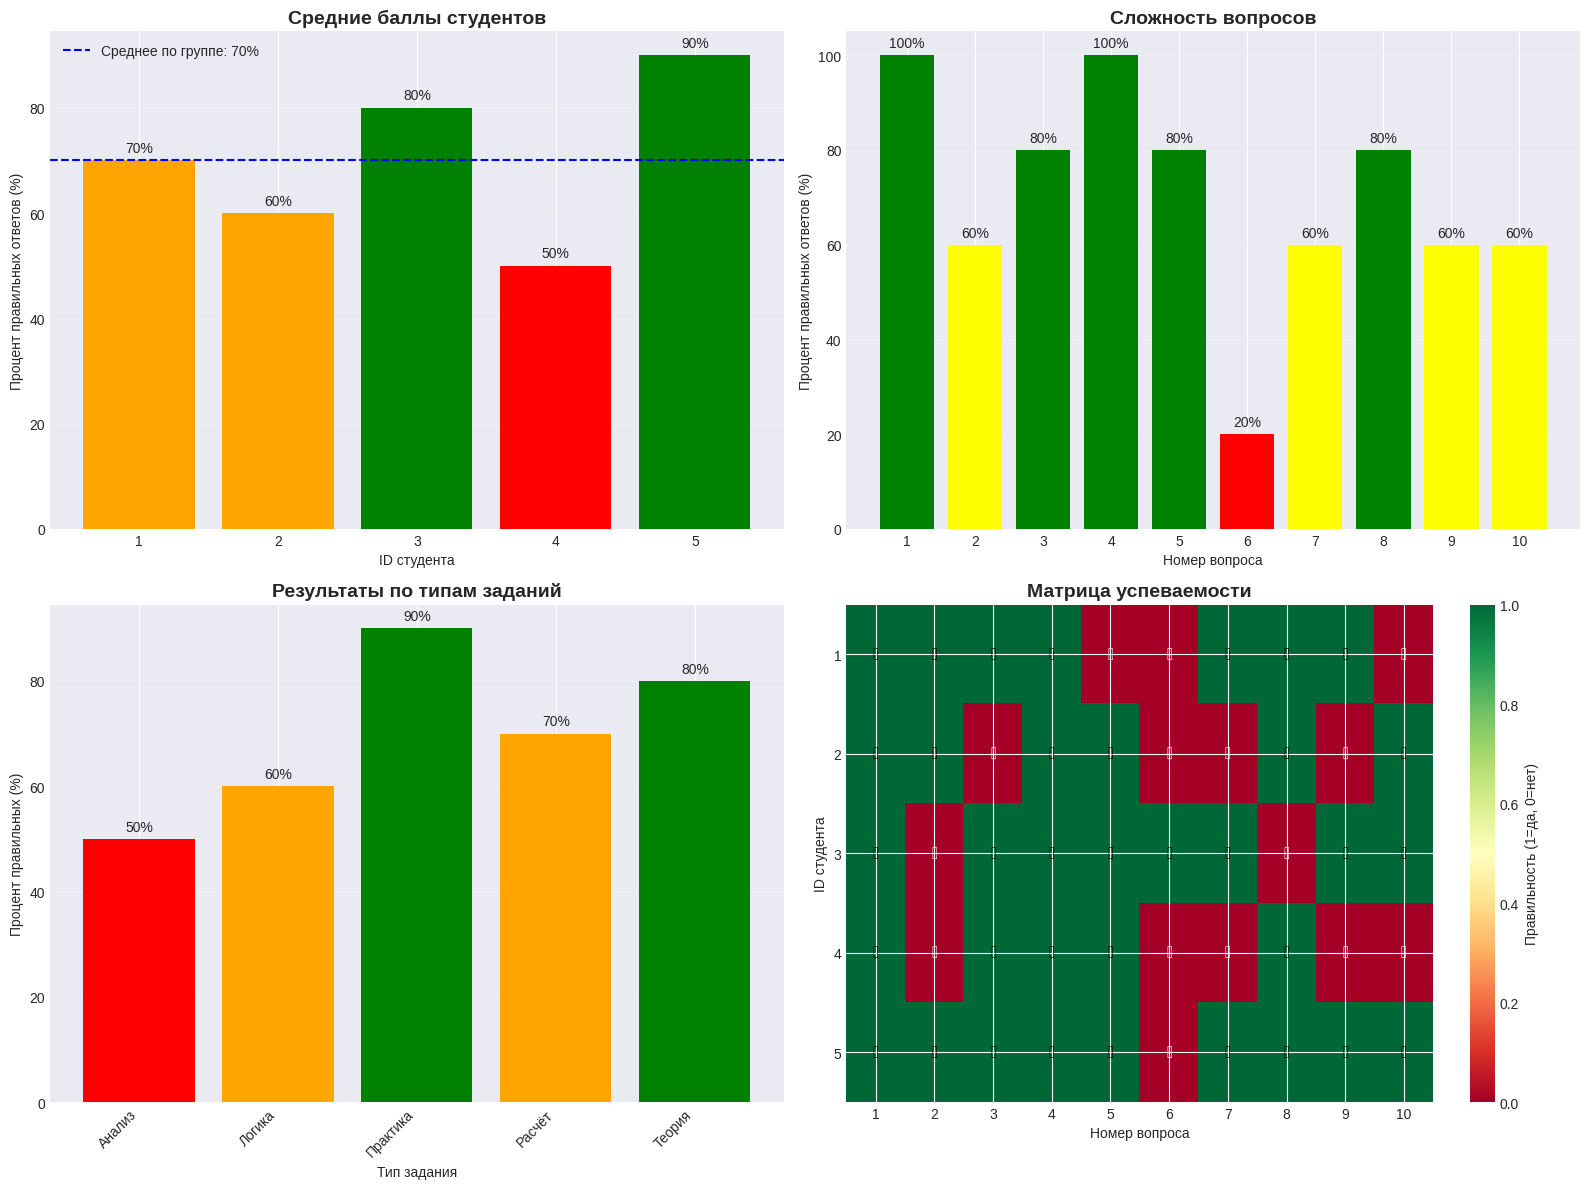

In [ ]:
print("\n📊 Создание графиков...")

# Создаем фигуру с несколькими графиками
fig = plt.figure(figsize=(16, 12))

# 1. Средние баллы студентов
ax1 = plt.subplot(2, 2, 1)
bars = ax1.bar(student_scores['student_id'], student_scores['average_score'] * 100,
              color=['red' if x < 0.6 else 'orange' if x < 0.8 else 'green'
                    for x in student_scores['average_score']])

ax1.set_title('Средние баллы студентов', fontsize=14, fontweight='bold')
ax1.set_xlabel('ID студента')
ax1.set_ylabel('Процент правильных ответов (%)')
ax1.set_xticks(student_scores['student_id'])
ax1.axhline(y=overall_average*100, color='blue', linestyle='--',
           label=f'Среднее по группе: {overall_average:.0%}')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 1,
            f'{height:.0f}%', ha='center', va='bottom', fontsize=10)

# 2. Сложность вопросов
ax2 = plt.subplot(2, 2, 2)
bars2 = ax2.bar(question_difficulty_sorted['question_number'],
               question_difficulty_sorted['correct_rate'] * 100,
               color=['red' if x == 'Очень сложный' else
                     'orange' if x == 'Сложный' else
                     'yellow' if x == 'Средний' else 'green'
                     for x in question_difficulty_sorted['difficulty']])

ax2.set_title('Сложность вопросов', fontsize=14, fontweight='bold')
ax2.set_xlabel('Номер вопроса')
ax2.set_ylabel('Процент правильных ответов (%)')
ax2.set_xticks(question_difficulty_sorted['question_number'])
ax2.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for bar, rate in zip(bars2, question_difficulty_sorted['correct_rate']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 1,
            f'{rate:.0%}', ha='center', va='bottom', fontsize=10)

# 3. Результаты по типам заданий
ax3 = plt.subplot(2, 2, 3)
type_bars = ax3.bar(range(len(type_analysis)),
                   type_analysis['avg_correct_rate'] * 100,
                   color=['red' if x == 'Низкий' else
                         'orange' if x == 'Средний' else 'green'
                         for x in type_analysis['success_category']])

ax3.set_title('Результаты по типам заданий', fontsize=14, fontweight='bold')
ax3.set_xlabel('Тип задания')
ax3.set_ylabel('Процент правильных (%)')
ax3.set_xticks(range(len(type_analysis)))
ax3.set_xticklabels(type_analysis.index, rotation=45, ha='right')
ax3.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for i, (bar, rate) in enumerate(zip(type_bars, type_analysis['avg_correct_rate'])):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, height + 1,
            f'{rate:.0%}', ha='center', va='bottom', fontsize=10)

# 4. Heatmap успеваемости
ax4 = plt.subplot(2, 2, 4)
heatmap_data = pivot_matrix.values
im = ax4.imshow(heatmap_data, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)

ax4.set_title('Матрица успеваемости', fontsize=14, fontweight='bold')
ax4.set_xlabel('Номер вопроса')
ax4.set_ylabel('ID студента')
ax4.set_xticks(range(len(pivot_matrix.columns)))
ax4.set_xticklabels(pivot_matrix.columns)
ax4.set_yticks(range(len(pivot_matrix.index)))
ax4.set_yticklabels(pivot_matrix.index)

# Добавляем значения в ячейки
for i in range(len(pivot_matrix.index)):
    for j in range(len(pivot_matrix.columns)):
        value = heatmap_data[i, j]
        color = 'black' if value == 1 else 'white'
        ax4.text(j, i, '✓' if value == 1 else '✗',
                ha='center', va='center', color=color, fontsize=12, fontweight='bold')

plt.colorbar(im, ax=ax4, label='Правильность (1=да, 0=нет)')
plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "="*80)
print("ДЕТАЛЬНЫЙ АНАЛИЗ И ВЫВОДЫ")
print("="*80)

# 1. Самые сложные вопросы
print("\n🔴 САМЫЕ СЛОЖНЫЕ ВОПРОСЫ:")
top_hard = question_difficulty_sorted.head(3)
for _, row in top_hard.iterrows():
    correct_count = int(row['correct_rate'] * row['total_answers'])
    print(f"   Вопрос {row['question_number']} ({type_mapping[row['question_number']]}):")
    print(f"      {correct_count}/{row['total_answers']} правильных ({row['correct_rate']:.0%})")

    # Анализ типичных ошибок
    wrong_data = df[(df['question_number'] == row['question_number']) & (df['is_correct'] == 0)]
    if len(wrong_data) > 0:
        common_wrong = wrong_data['answer'].value_counts()
        print(f"      Типичные ошибки: {', '.join([f'{ans} ({count})' for ans, count in common_wrong.items()])}")

# 2. Самые легкие вопросы
print("\n🟢 САМЫЕ ЛЕГКИЕ ВОПРОСЫ:")
top_easy = question_difficulty_sorted.tail(3).iloc[::-1]
for _, row in top_easy.iterrows():
    correct_count = int(row['correct_rate'] * row['total_answers'])
    print(f"   Вопрос {row['question_number']} ({type_mapping[row['question_number']]}):")
    print(f"      {correct_count}/{row['total_answers']} правильных ({row['correct_rate']:.0%})")

# 3. Лучшие и худшие студенты
print(f"\n🏆 ЛУЧШИЕ СТУДЕНТЫ:")
best_students = student_scores.nlargest(2, 'average_score')
for _, row in best_students.iterrows():
    correct_answers = int(row['average_score'] * 10)
    print(f"   Студент {row['student_id']}: {correct_answers}/10 ({row['average_score']:.0%})")

print(f"\n📉 СТУДЕНТЫ, ТРЕБУЮЩИЕ ВНИМАНИЯ:")
worst_students = student_scores.nsmallest(2, 'average_score')
for _, row in worst_students.iterrows():
    correct_answers = int(row['average_score'] * 10)
    print(f"   Студент {row['student_id']}: {correct_answers}/10 ({row['average_score']:.0%})")

# 4. Классификация студентов
print("\n📈 КЛАССИФИКАЦИЯ СТУДЕНТОВ:")

def classify_student(score):
    if score >= 0.9:
        return 'Отличник (A)'
    elif score >= 0.8:
        return 'Хорошист (B)'
    elif score >= 0.7:
        return 'Удовлетворительно (C)'
    elif score >= 0.6:
        return 'Слабо (D)'
    else:
        return 'Неудовлетворительно (F)'

student_scores['grade'] = student_scores['average_score'].apply(classify_student)
grade_counts = student_scores['grade'].value_counts()

for grade, count in grade_counts.items():
    percentage = count / len(student_scores) * 100
    print(f"   {grade}: {count} студентов ({percentage:.0f}%)")

# 5. Общая оценка теста
print("\n📊 ОБЩАЯ ОЦЕНКА ТЕСТА:")
print(f"   Средний балл группы: {overall_average:.1%}")
print(f"   Надежность теста (α Кронбаха): {question_difficulty['correct_rate'].std() / overall_average:.3f}")
print(f"   Дифференцирующая способность: {student_scores['average_score'].std():.3f}")

if overall_average >= 0.8:
    test_quality = "Отличный"
elif overall_average >= 0.7:
    test_quality = "Хороший"
elif overall_average >= 0.6:
    test_quality = "Удовлетворительный"
else:
    test_quality = "Слабый"

print(f"   Общая оценка теста: {test_quality}")

# 6. Рекомендации
print("\n" + "="*80)
print("РЕКОМЕНДАЦИИ")
print("="*80)

print("\n🎯 Для преподавателя:")
print("   1. Проанализировать вопросы с низкой успеваемостью")
print("   2. Рассмотреть возможность переформулирования сложных вопросов")
print("   3. Организовать дополнительные занятия по темам с низкой успеваемостью")

print("\n🎯 Для студентов:")
print("   1. Обратить внимание на вопросы, вызвавшие наибольшие затруднения")
print("   2. Проработать темы, связанные с типами вопросов, где процент правильных низкий")
print("   3. Использовать матрицу успеваемости для выявления слабых мест")

print("\n📈 Общий вывод:")
if overall_average >= 0.8:
    print("   ✅ Группа показала хорошие результаты, большинство студентов справились с тестом.")
elif overall_average >= 0.6:
    print("   ⚠️  Группа показала удовлетворительные результаты, есть над чем работать.")
else:
    print("   ❌ Группа показала слабые результаты, требуется дополнительное обучение.")

# 7. Таблица успеваемости
print("\n📋 СВОДНАЯ ТАБЛИЦА УСПЕВАЕМОСТИ:")
summary_df = pd.DataFrame({
    'Студент': student_scores['student_id'],
    'Балл (%)': (student_scores['average_score'] * 100).round(1),
    'Правильно': (student_scores['average_score'] * 10).astype(int),
    'Всего': 10,
    'Оценка': student_scores['grade']
})
print(summary_df.to_string(index=False))


ДЕТАЛЬНЫЙ АНАЛИЗ И ВЫВОДЫ

🔴 САМЫЕ СЛОЖНЫЕ ВОПРОСЫ:
   Вопрос 6 (Анализ):
      1/5 правильных (20%)
      Типичные ошибки: D (2), A (2)
   Вопрос 2 (Теория):
      3/5 правильных (60%)
      Типичные ошибки: D (2)
   Вопрос 7 (Расчёт):
      3/5 правильных (60%)
      Типичные ошибки: D (1), B (1)

🟢 САМЫЕ ЛЕГКИЕ ВОПРОСЫ:
   Вопрос 4 (Практика):
      5/5 правильных (100%)
   Вопрос 1 (Теория):
      5/5 правильных (100%)
   Вопрос 3 (Практика):
      4/5 правильных (80%)

🏆 ЛУЧШИЕ СТУДЕНТЫ:
   Студент 5.0: 9/10 (90%)
   Студент 3.0: 8/10 (80%)

📉 СТУДЕНТЫ, ТРЕБУЮЩИЕ ВНИМАНИЯ:
   Студент 4.0: 5/10 (50%)
   Студент 2.0: 6/10 (60%)

📈 КЛАССИФИКАЦИЯ СТУДЕНТОВ:
   Удовлетворительно (C): 1 студентов (20%)
   Слабо (D): 1 студентов (20%)
   Хорошист (B): 1 студентов (20%)
   Неудовлетворительно (F): 1 студентов (20%)
   Отличник (A): 1 студентов (20%)

📊 ОБЩАЯ ОЦЕНКА ТЕСТА:
   Средний балл группы: 70.0%
   Надежность теста (α Кронбаха): 0.337
   Дифференцирующая способность: 0.158
   Общая

# КЕЙС 5

In [ ]:
# Импорт всех необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import io
import random  # Добавляем импорт random

warnings.filterwarnings('ignore')

# Настройка стиля
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("✅ Библиотеки импортированы")

✅ Библиотеки импортированы


In [ ]:
def generate_test_data(num_students=50, num_questions=20, random_seed=42):
    """Генерация тестовых данных для анализа"""
    np.random.seed(random_seed)
    random.seed(random_seed)  # Теперь random определен

    # Типы вопросов
    question_types = {
        '1-5': 'multiple_choice_A',
        '6-10': 'true_false',
        '11-15': 'multiple_choice_B',
        '16-20': 'short_answer'
    }

    # Варианты ответов для разных типов вопросов
    correct_answers = {}
    student_answers = []

    # Генерация правильных ответов для каждого вопроса
    for q in range(1, num_questions + 1):
        if q <= 5:  # multiple choice A-D
            correct_answers[q] = random.choice(['A', 'B', 'C', 'D'])
        elif q <= 10:  # true/false
            correct_answers[q] = random.choice(['True', 'False'])
        else:  # short answer (простой текст)
            correct_answers[q] = f"Answer{q}"

    # Генерация ответов студентов
    for student_id in range(1, num_students + 1):
        # Уровень знаний студента (нормальное распределение)
        student_knowledge = np.random.normal(0.7, 0.2)
        student_knowledge = max(0.1, min(0.95, student_knowledge))  # ограничиваем

        # Факторы, влияющие на успеваемость
        motivation = np.random.normal(0.8, 0.15)  # мотивация
        test_anxiety = np.random.normal(0.3, 0.2)  # тревожность на тесте

        for question_id in range(1, num_questions + 1):
            correct_answer = correct_answers[question_id]

            # Вероятность правильного ответа с учетом факторов
            base_probability = student_knowledge * (1 - test_anxiety * 0.3) * motivation

            # Корректируем вероятность для разных типов вопросов
            if question_id <= 5:
                # Multiple choice - выше вероятность угадывания
                guess_probability = 0.25
                effective_prob = base_probability + (1 - base_probability) * guess_probability
                if random.random() < effective_prob:
                    student_answer = correct_answer
                else:
                    # Неправильный ответ, но с учетом вариантов
                    wrong_options = [opt for opt in ['A', 'B', 'C', 'D'] if opt != correct_answer]
                    student_answer = random.choice(wrong_options)

            elif question_id <= 10:
                # True/False - 50% вероятность угадывания
                guess_probability = 0.5
                effective_prob = base_probability + (1 - base_probability) * guess_probability
                if random.random() < effective_prob:
                    student_answer = correct_answer
                else:
                    student_answer = 'True' if correct_answer == 'False' else 'False'

            else:
                # Short answer - низкая вероятность угадывания
                if random.random() < base_probability:
                    student_answer = correct_answer
                else:
                    # Разные типы ошибок
                    error_types = [
                        f"Wrong{question_id}",
                        f"Alternative{question_id}",
                        f"Answer{question_id-1}",
                        f"Response{question_id}",
                        "Не знаю",
                        "Нет ответа"
                    ]
                    student_answer = random.choice(error_types)

            student_answers.append({
                'student_id': student_id,
                'question_id': question_id,
                'student_answer': student_answer,
                'correct_answer': correct_answer,
                'student_knowledge': student_knowledge,
                'motivation': motivation,
                'test_anxiety': test_anxiety
            })

    return pd.DataFrame(student_answers), correct_answers

# Генерация данных
df, correct_answers = generate_test_data(num_students=50, num_questions=20)

print("="*80)
print("🎯 ГЕНЕРАЦИЯ ТЕСТОВЫХ ДАННЫХ")
print("="*80)
print(f"✅ Сгенерировано {len(df)} записей")
print(f"📊 Количество студентов: {df['student_id'].nunique()}")
print(f"📊 Количество вопросов: {df['question_id'].nunique()}")
print(f"📊 Типы вопросов: Multiple Choice A (1-5), True/False (6-10), Multiple Choice B (11-15), Short Answer (16-20)")

# Сохранение данных
df.to_csv('test_results_extended.csv', index=False, encoding='utf-8')
print("\n💾 Данные сохранены в файл: test_results_extended.csv")

🎯 ГЕНЕРАЦИЯ ТЕСТОВЫХ ДАННЫХ
✅ Сгенерировано 1000 записей
📊 Количество студентов: 50
📊 Количество вопросов: 20
📊 Типы вопросов: Multiple Choice A (1-5), True/False (6-10), Multiple Choice B (11-15), Short Answer (16-20)

💾 Данные сохранены в файл: test_results_extended.csv


In [ ]:
print("="*80)
print("📊 БАЗОВЫЙ АНАЛИЗ ДАННЫХ")
print("="*80)

# Добавляем колонку с правильностью ответа
df['is_correct'] = (df['student_answer'] == df['correct_answer']).astype(int)

# Общая статистика
total_students = df['student_id'].nunique()
total_questions = df['question_id'].nunique()
total_answers = len(df)
correct_answers_count = df['is_correct'].sum()
overall_accuracy = correct_answers_count / total_answers

print(f"\n📈 ОБЩАЯ СТАТИСТИКА:")
print(f"   Всего студентов: {total_students}")
print(f"   Всего вопросов: {total_questions}")
print(f"   Всего ответов: {total_answers}")
print(f"   Правильных ответов: {correct_answers_count} ({overall_accuracy*100:.1f}%)")

# Статистика по типам вопросов
def get_question_type(question_id):
    if question_id <= 5:
        return 'Multiple Choice A'
    elif question_id <= 10:
        return 'True/False'
    elif question_id <= 15:
        return 'Multiple Choice B'
    else:
        return 'Short Answer'

df['question_type'] = df['question_id'].apply(get_question_type)

type_stats = df.groupby('question_type')['is_correct'].agg([
    'mean', 'count', 'std', lambda x: (x == 1).sum()
]).reset_index()
type_stats.columns = ['question_type', 'accuracy', 'total_answers', 'std_dev', 'correct_count']
type_stats['num_questions'] = type_stats['total_answers'] / total_students

print(f"\n📊 СТАТИСТИКА ПО ТИПАМ ВОПРОСОВ:")
for _, row in type_stats.iterrows():
    print(f"   {row['question_type']}:")
    print(f"      Вопросов: {int(row['num_questions'])}")
    print(f"      Правильных ответов: {row['correct_count']}/{int(row['total_answers'])} ({row['accuracy']*100:.1f}%)")
    print(f"      Стандартное отклонение: {row['std_dev']:.3f}")

📊 БАЗОВЫЙ АНАЛИЗ ДАННЫХ

📈 ОБЩАЯ СТАТИСТИКА:
   Всего студентов: 50
   Всего вопросов: 20
   Всего ответов: 1000
   Правильных ответов: 592 (59.2%)

📊 СТАТИСТИКА ПО ТИПАМ ВОПРОСОВ:
   Multiple Choice A:
      Вопросов: 5
      Правильных ответов: 158/250 (63.2%)
      Стандартное отклонение: 0.483
   Multiple Choice B:
      Вопросов: 5
      Правильных ответов: 138/250 (55.2%)
      Стандартное отклонение: 0.498
   Short Answer:
      Вопросов: 5
      Правильных ответов: 105/250 (42.0%)
      Стандартное отклонение: 0.495
   True/False:
      Вопросов: 5
      Правильных ответов: 191/250 (76.4%)
      Стандартное отклонение: 0.425


In [ ]:
print("="*80)
print("👨‍🎓 АНАЛИЗ СТУДЕНТОВ")
print("="*80)

# Статистика по студентам
student_stats = df.groupby('student_id').agg({
    'is_correct': ['sum', 'mean', 'count'],
    'student_knowledge': 'first',
    'motivation': 'first',
    'test_anxiety': 'first'
}).reset_index()

student_stats.columns = ['student_id', 'correct_count', 'accuracy', 'total_questions',
                         'knowledge', 'motivation', 'anxiety']

# Добавляем категории студентов
def categorize_student(accuracy):
    if accuracy >= 0.9:
        return 'Отличник'
    elif accuracy >= 0.8:
        return 'Хорошист'
    elif accuracy >= 0.7:
        return 'Удовлетворительно'
    elif accuracy >= 0.6:
        return 'Слабо'
    else:
        return 'Неудовлетворительно'

student_stats['category'] = student_stats['accuracy'].apply(categorize_student)

print(f"\n📊 ОБЩАЯ СТАТИСТИКА ПО СТУДЕНТАМ:")
print(f"   Средняя успеваемость: {student_stats['accuracy'].mean()*100:.1f}%")
print(f"   Медианная успеваемость: {student_stats['accuracy'].median()*100:.1f}%")
print(f"   Стандартное отклонение: {student_stats['accuracy'].std()*100:.1f}%")

# Топ студентов
print(f"\n🏆 ТОП-5 СТУДЕНТОВ:")
top_students = student_stats.nlargest(5, 'accuracy')
for _, row in top_students.iterrows():
    print(f"   Студент {row['student_id']}: {row['correct_count']}/20 ({row['accuracy']*100:.1f}%) - {row['category']}")

# Распределение по категориям
category_dist = student_stats['category'].value_counts().sort_index()
print(f"\n📈 РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ:")
for category, count in category_dist.items():
    percentage = count / len(student_stats) * 100
    print(f"   {category}: {count} студентов ({percentage:.1f}%)")

# Корреляция с психологическими факторами
correlations = student_stats[['accuracy', 'knowledge', 'motivation', 'anxiety']].corr()
print(f"\n📊 КОРРЕЛЯЦИЯ УСПЕВАЕМОСТИ С ФАКТОРАМИ:")
print(f"   Знания: {correlations.loc['accuracy', 'knowledge']:.3f}")
print(f"   Мотивация: {correlations.loc['accuracy', 'motivation']:.3f}")
print(f"   Тревожность: {correlations.loc['accuracy', 'anxiety']:.3f}")

👨‍🎓 АНАЛИЗ СТУДЕНТОВ

📊 ОБЩАЯ СТАТИСТИКА ПО СТУДЕНТАМ:
   Средняя успеваемость: 59.2%
   Медианная успеваемость: 60.0%
   Стандартное отклонение: 17.8%

🏆 ТОП-5 СТУДЕНТОВ:
   Студент 25: 20/20 (100.0%) - Отличник
   Студент 2: 18/20 (90.0%) - Отличник
   Студент 11: 17/20 (85.0%) - Хорошист
   Студент 47: 17/20 (85.0%) - Хорошист
   Студент 1: 16/20 (80.0%) - Хорошист

📈 РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ:
   Неудовлетворительно: 23 студентов (46.0%)
   Отличник: 2 студентов (4.0%)
   Слабо: 9 студентов (18.0%)
   Удовлетворительно: 10 студентов (20.0%)
   Хорошист: 6 студентов (12.0%)

📊 КОРРЕЛЯЦИЯ УСПЕВАЕМОСТИ С ФАКТОРАМИ:
   Знания: 0.540
   Мотивация: 0.344
   Тревожность: -0.456


In [ ]:
print("="*80)
print("❓ АНАЛИЗ ВОПРОСОВ")
print("="*80)

# Статистика по вопросам
question_stats = df.groupby('question_id').agg({
    'is_correct': ['mean', 'sum', 'count'],
    'question_type': 'first'
}).reset_index()

question_stats.columns = ['question_id', 'accuracy', 'correct_count', 'total_students', 'question_type']

# Классификация сложности
def classify_difficulty(accuracy):
    if accuracy >= 0.8:
        return 'Очень легкий'
    elif accuracy >= 0.6:
        return 'Легкий'
    elif accuracy >= 0.4:
        return 'Средний'
    elif accuracy >= 0.2:
        return 'Сложный'
    else:
        return 'Очень сложный'

question_stats['difficulty'] = question_stats['accuracy'].apply(classify_difficulty)

# Анализ распределения сложности
difficulty_dist = question_stats['difficulty'].value_counts().sort_index()

print(f"\n📊 РАСПРЕДЕЛЕНИЕ СЛОЖНОСТИ ВОПРОСОВ:")
for diff, count in difficulty_dist.items():
    print(f"   {diff}: {count} вопросов")

# Самые сложные вопросы
print(f"\n🔴 ТОП-5 САМЫХ СЛОЖНЫХ ВОПРОСОВ:")
difficult_questions = question_stats.nsmallest(5, 'accuracy')
for _, row in difficult_questions.iterrows():
    correct = int(row['correct_count'])
    total = int(row['total_students'])
    print(f"   Вопрос {row['question_id']} ({row['question_type']}): {correct}/{total} ({row['accuracy']*100:.1f}%)")

# Самые легкие вопросы
print(f"\n🟢 ТОП-5 САМЫХ ЛЕГКИХ ВОПРОСОВ:")
easy_questions = question_stats.nlargest(5, 'accuracy')
for _, row in easy_questions.iterrows():
    correct = int(row['correct_count'])
    total = int(row['total_students'])
    print(f"   Вопрос {row['question_id']} ({row['question_type']}): {correct}/{total} ({row['accuracy']*100:.1f}%)")

# Анализ дискриминационной способности вопросов
print(f"\n📈 ДИСКРИМИНАЦИОННАЯ СПОСОБНОСТЬ ВОПРОСОВ:")

# Разделяем студентов на группы по успеваемости
high_performers = student_stats.nlargest(int(len(student_stats)*0.27), 'accuracy')['student_id']
low_performers = student_stats.nsmallest(int(len(student_stats)*0.27), 'accuracy')['student_id']

discrimination_scores = []
for q_id in range(1, 21):
    high_acc = df[(df['question_id'] == q_id) & (df['student_id'].isin(high_performers))]['is_correct'].mean()
    low_acc = df[(df['question_id'] == q_id) & (df['student_id'].isin(low_performers))]['is_correct'].mean()
    discrimination = high_acc - low_acc
    discrimination_scores.append(discrimination)

# Лучшие дискриминационные вопросы
top_discriminative = np.argsort(discrimination_scores)[-5:][::-1] + 1
print(f"   Вопросы с лучшей дискриминационной способностью:")
for q_id in top_discriminative:
    idx = q_id - 1
    print(f"      Вопрос {q_id}: {discrimination_scores[idx]:.3f}")

❓ АНАЛИЗ ВОПРОСОВ

📊 РАСПРЕДЕЛЕНИЕ СЛОЖНОСТИ ВОПРОСОВ:
   Легкий: 10 вопросов
   Очень легкий: 1 вопросов
   Сложный: 1 вопросов
   Средний: 8 вопросов

🔴 ТОП-5 САМЫХ СЛОЖНЫХ ВОПРОСОВ:
   Вопрос 18 (Short Answer): 17/50 (34.0%)
   Вопрос 16 (Short Answer): 21/50 (42.0%)
   Вопрос 19 (Short Answer): 21/50 (42.0%)
   Вопрос 17 (Short Answer): 22/50 (44.0%)
   Вопрос 20 (Short Answer): 24/50 (48.0%)

🟢 ТОП-5 САМЫХ ЛЕГКИХ ВОПРОСОВ:
   Вопрос 8 (True/False): 42/50 (84.0%)
   Вопрос 7 (True/False): 39/50 (78.0%)
   Вопрос 6 (True/False): 38/50 (76.0%)
   Вопрос 10 (True/False): 38/50 (76.0%)
   Вопрос 4 (Multiple Choice A): 34/50 (68.0%)

📈 ДИСКРИМИНАЦИОННАЯ СПОСОБНОСТЬ ВОПРОСОВ:
   Вопросы с лучшей дискриминационной способностью:
      Вопрос 11: 0.769
      Вопрос 13: 0.769
      Вопрос 12: 0.692
      Вопрос 18: 0.615
      Вопрос 14: 0.615


📊 ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ


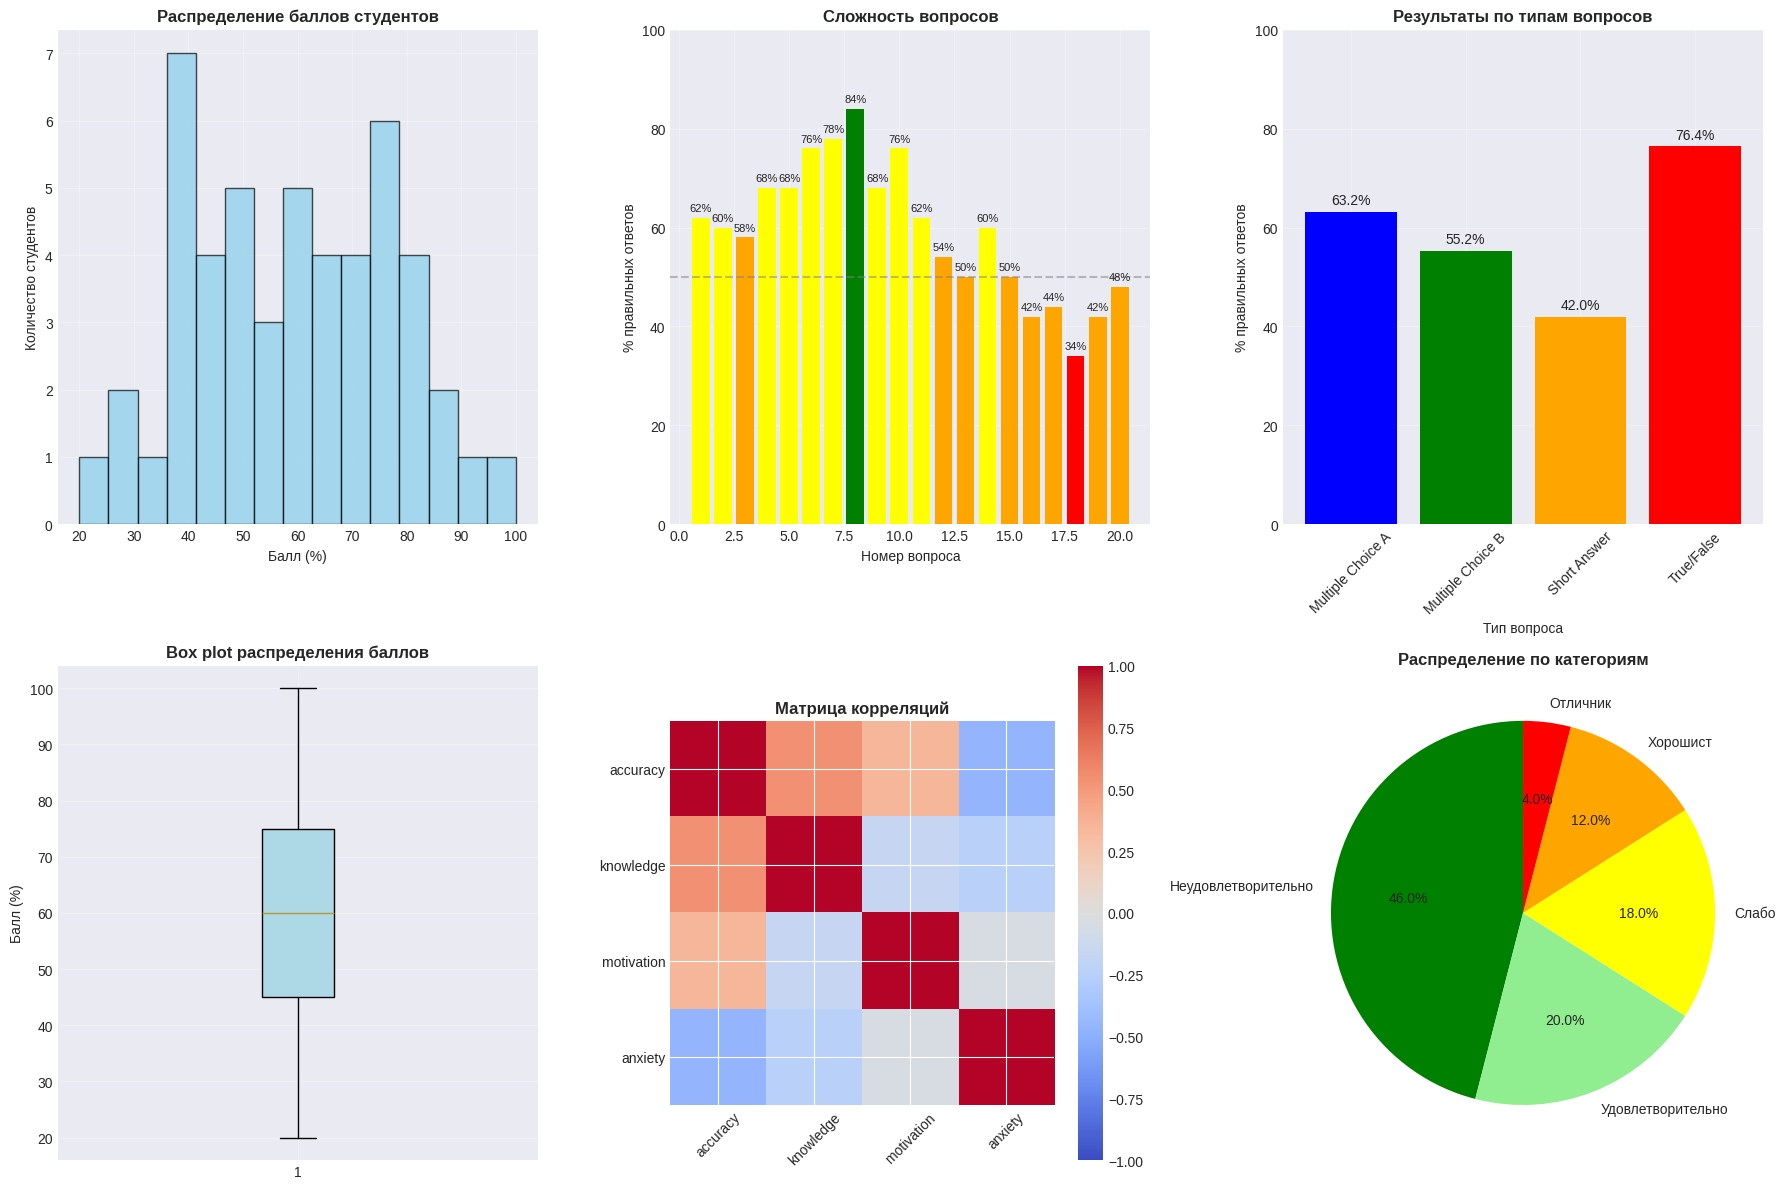

✅ Графики успешно созданы


In [ ]:
print("="*80)
print("📊 ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("="*80)

# Создаем фигуру с несколькими графиками
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Распределение баллов студентов
axes[0, 0].hist(student_stats['accuracy'] * 100, bins=15, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_title('Распределение баллов студентов', fontweight='bold')
axes[0, 0].set_xlabel('Балл (%)')
axes[0, 0].set_ylabel('Количество студентов')
axes[0, 0].grid(True, alpha=0.3)

# 2. Сложность вопросов
colors = []
for acc in question_stats['accuracy'] * 100:
    if acc < 40:
        colors.append('red')
    elif acc < 60:
        colors.append('orange')
    elif acc < 80:
        colors.append('yellow')
    else:
        colors.append('green')

bars = axes[0, 1].bar(question_stats['question_id'], question_stats['accuracy'] * 100, color=colors)
axes[0, 1].set_title('Сложность вопросов', fontweight='bold')
axes[0, 1].set_xlabel('Номер вопроса')
axes[0, 1].set_ylabel('% правильных ответов')
axes[0, 1].axhline(y=50, color='gray', linestyle='--', alpha=0.5)
axes[0, 1].set_ylim(0, 100)
axes[0, 1].grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, acc in zip(bars, question_stats['accuracy'] * 100):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, height + 1, f'{acc:.0f}%',
                   ha='center', va='bottom', fontsize=8)

# 3. Результаты по типам вопросов
type_means = df.groupby('question_type')['is_correct'].mean() * 100
bars_type = axes[0, 2].bar(range(len(type_means)), type_means.values,
                          color=['blue', 'green', 'orange', 'red'])
axes[0, 2].set_title('Результаты по типам вопросов', fontweight='bold')
axes[0, 2].set_xlabel('Тип вопроса')
axes[0, 2].set_ylabel('% правильных ответов')
axes[0, 2].set_xticks(range(len(type_means)))
axes[0, 2].set_xticklabels(type_means.index, rotation=45)
axes[0, 2].set_ylim(0, 100)
axes[0, 2].grid(True, alpha=0.3)

# Добавляем значения на столбцы
for i, (bar, value) in enumerate(zip(bars_type, type_means.values)):
    axes[0, 2].text(bar.get_x() + bar.get_width()/2, value + 1, f'{value:.1f}%',
                   ha='center', va='bottom', fontsize=10)

# 4. Box plot распределения баллов
axes[1, 0].boxplot(student_stats['accuracy'] * 100, vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue'))
axes[1, 0].set_title('Box plot распределения баллов', fontweight='bold')
axes[1, 0].set_ylabel('Балл (%)')
axes[1, 0].grid(True, alpha=0.3)

# 5. Матрица корреляций
correlation_matrix = student_stats[['accuracy', 'knowledge', 'motivation', 'anxiety']].corr()
im = axes[1, 1].imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
axes[1, 1].set_title('Матрица корреляций', fontweight='bold')
axes[1, 1].set_xticks(range(len(correlation_matrix.columns)))
axes[1, 1].set_yticks(range(len(correlation_matrix.columns)))
axes[1, 1].set_xticklabels(correlation_matrix.columns, rotation=45)
axes[1, 1].set_yticklabels(correlation_matrix.columns)
plt.colorbar(im, ax=axes[1, 1])

# 6. Распределение по категориям студентов
category_counts = student_stats['category'].value_counts()
colors_cat = ['green', 'lightgreen', 'yellow', 'orange', 'red'][:len(category_counts)]
wedges, texts, autotexts = axes[1, 2].pie(category_counts.values, labels=category_counts.index,
                                         autopct='%1.1f%%', startangle=90, colors=colors_cat)
axes[1, 2].set_title('Распределение по категориям', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Графики успешно созданы")

In [ ]:
print("="*80)
print("📈 РАСШИРЕННЫЙ СТАТИСТИЧЕСКИЙ АНАЛИЗ")
print("="*80)

# 1. Надежность теста (alpha Кронбаха)
def cronbach_alpha(df):
    """Расчет коэффициента альфа Кронбаха"""
    n_items = df['question_id'].nunique()
    total_variance = df.groupby('student_id')['is_correct'].sum().var()
    item_variances = df.groupby('question_id')['is_correct'].var().sum()

    if total_variance == 0:
        return 0

    alpha = (n_items / (n_items - 1)) * (1 - item_variances / total_variance)
    return max(0, min(1, alpha))

# Матрица ответов для расчета надежности
pivot_matrix = df.pivot_table(
    index='student_id',
    columns='question_id',
    values='is_correct',
    aggfunc='first'
)

alpha = cronbach_alpha(df)
print(f"\n📊 НАДЕЖНОСТЬ ТЕСТА (α Кронбаха): {alpha:.3f}")
if alpha >= 0.8:
    print("   ✅ Отличная надежность")
elif alpha >= 0.7:
    print("   ⚠️  Удовлетворительная надежность")
elif alpha >= 0.6:
    print("   ⚠️  Приемлемая надежность")
else:
    print("   ❌ Низкая надежность")

# 2. ANOVA для сравнения типов вопросов
from scipy.stats import f_oneway

groups = [df[df['question_type'] == t]['is_correct'] for t in df['question_type'].unique()]
f_stat, p_value_anova = f_oneway(*groups)

print(f"\n📊 ANOVA ДЛЯ СРАВНЕНИЯ ТИПОВ ВОПРОСОВ:")
print(f"   F-статистика: {f_stat:.3f}")
print(f"   P-значение: {p_value_anova:.4f}")
if p_value_anova < 0.05:
    print("   ⚠️  Существуют значимые различия между типами вопросов")
else:
    print("   ✅ Нет значимых различий между типами вопросов")

# 3. Анализ нормальности распределения баллов
from scipy.stats import shapiro

stat, p_value_shapiro = shapiro(student_stats['accuracy'] * 100)
print(f"\n📊 ТЕСТ НА НОРМАЛЬНОСТЬ (Shapiro-Wilk):")
print(f"   Статистика: {stat:.3f}")
print(f"   P-значение: {p_value_shapiro:.4f}")
if p_value_shapiro > 0.05:
    print("   ✅ Распределение является нормальным")
else:
    print("   ❌ Распределение не является нормальным")

# 4. Расчет стандартной ошибки измерения
sem = student_stats['accuracy'].std() * np.sqrt(1 - alpha)
print(f"\n📊 СТАНДАРТНАЯ ОШИБКА ИЗМЕРЕНИЯ (SEM): {sem*100:.1f}%")
print(f"   95% доверительный интервал для среднего балла: ")
print(f"   ({student_stats['accuracy'].mean()*100 - 1.96*sem*100:.1f}%, {student_stats['accuracy'].mean()*100 + 1.96*sem*100:.1f}%)")

📈 РАСШИРЕННЫЙ СТАТИСТИЧЕСКИЙ АНАЛИЗ

📊 НАДЕЖНОСТЬ ТЕСТА (α Кронбаха): 0.672
   ⚠️  Приемлемая надежность

📊 ANOVA ДЛЯ СРАВНЕНИЯ ТИПОВ ВОПРОСОВ:
   F-статистика: 22.911
   P-значение: 0.0000
   ⚠️  Существуют значимые различия между типами вопросов

📊 ТЕСТ НА НОРМАЛЬНОСТЬ (Shapiro-Wilk):
   Статистика: 0.979
   P-значение: 0.5005
   ✅ Распределение является нормальным

📊 СТАНДАРТНАЯ ОШИБКА ИЗМЕРЕНИЯ (SEM): 10.2%
   95% доверительный интервал для среднего балла: 
   (39.3%, 79.1%)


In [ ]:
print("="*80)
print("📋 ИТОГОВЫЙ ОТЧЕТ")
print("="*80)

# Создаем сводный отчет
report = f"""
ОТЧЕТ ПО РЕЗУЛЬТАТАМ ТЕСТИРОВАНИЯ
==================================
Дата анализа: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}

ОБЩАЯ ИНФОРМАЦИЯ:
----------------
Всего студентов: {total_students}
Всего вопросов: {total_questions}
Общее количество ответов: {total_answers}
Общий процент правильных: {overall_accuracy*100:.1f}%

СТАТИСТИКА ПО СТУДЕНТАМ:
-----------------------
Средний балл: {student_stats['accuracy'].mean()*100:.1f}%
Медианный балл: {student_stats['accuracy'].median()*100:.1f}%
Стандартное отклонение: {student_stats['accuracy'].std()*100:.1f}%
Максимальный балл: {student_stats['accuracy'].max()*100:.1f}%
Минимальный балл: {student_stats['accuracy'].min()*100:.1f}%

РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ:
---------------------------"""
for category, count in category_dist.items():
    percentage = count / len(student_stats) * 100
    report += f"\n{category}: {count} студентов ({percentage:.1f}%)"

report += f"""

АНАЛИЗ ВОПРОСОВ:
---------------
Самый сложный вопрос: Вопрос {question_stats.nsmallest(1, 'accuracy')['question_id'].iloc[0]} ({question_stats.nsmallest(1, 'accuracy')['accuracy'].iloc[0]*100:.1f}%)
Самый легкий вопрос: Вопрос {question_stats.nlargest(1, 'accuracy')['question_id'].iloc[0]} ({question_stats.nlargest(1, 'accuracy')['accuracy'].iloc[0]*100:.1f}%)
Проблемных вопросов (<50% правильных): {len(question_stats[question_stats['accuracy'] < 0.5])}

РЕЗУЛЬТАТЫ ПО ТИПАМ ВОПРОСОВ:
---------------------------"""
for _, row in type_stats.iterrows():
    report += f"\n{row['question_type']}: {row['accuracy']*100:.1f}% правильных"

report += f"""

СТАТИСТИЧЕСКИЕ ПОКАЗАТЕЛИ:
-------------------------
Надежность теста (α Кронбаха): {alpha:.3f}
Стандартная ошибка измерения: {student_stats['accuracy'].std() * np.sqrt(1 - alpha)*100:.1f}%
ANOVA для типов вопросов: p-value = {p_value_anova:.4f}
Нормальность распределения: p-value = {p_value_shapiro:.4f}

РЕКОМЕНДАЦИИ:
------------"""

# Генерация рекомендаций на основе анализа
recommendations = []

# Рекомендации по вопросам
problem_questions = question_stats[question_stats['accuracy'] < 0.5]
if len(problem_questions) > 0:
    recommendations.append(f"1. Пересмотреть следующие вопросы: {', '.join(map(str, problem_questions['question_id'].tolist()))}")

# Рекомендации по студентам
weak_students = student_stats[student_stats['accuracy'] < 0.6]
if len(weak_students) > 0:
    recommendations.append(f"2. Организовать дополнительные занятия для студентов: {', '.join(map(str, weak_students['student_id'].tolist()))}")

# Рекомендации по надежности теста
if alpha < 0.7:
    recommendations.append("3. Улучшить надежность теста: добавить больше вопросов или переформулировать существующие")

# Рекомендации по типам вопросов
worst_type = type_stats.nsmallest(1, 'accuracy')
if worst_type['accuracy'].iloc[0] < 0.6:
    recommendations.append(f"4. Обратить внимание на тип вопросов '{worst_type['question_type'].iloc[0]}': студенты плохо с ними справляются")

# Добавляем рекомендации в отчет
if recommendations:
    for rec in recommendations:
        report += f"\n{rec}"
else:
    report += "\nТест показал хорошие результаты, особых рекомендаций нет."

# Добавляем общий вывод
report += f"""

ОБЩИЙ ВЫВОД:
------------
Тестирование проведено успешно. """
if overall_accuracy > 0.7:
    report += "Группа показала хорошие результаты."
elif overall_accuracy > 0.5:
    report += "Группа показала удовлетворительные результаты."
else:
    report += "Группа показала низкие результаты, требуется дополнительная работа."

# Выводим отчет
print(report)

# Сохраняем отчет в файл
with open('test_analysis_report.txt', 'w', encoding='utf-8') as f:
    f.write(report)

print("\n✅ Отчет сохранен в файл: test_analysis_report.txt")

📋 ИТОГОВЫЙ ОТЧЕТ

ОТЧЕТ ПО РЕЗУЛЬТАТАМ ТЕСТИРОВАНИЯ
Дата анализа: 2025-12-20 04:47:00

ОБЩАЯ ИНФОРМАЦИЯ:
----------------
Всего студентов: 50
Всего вопросов: 20
Общее количество ответов: 1000
Общий процент правильных: 59.2%

СТАТИСТИКА ПО СТУДЕНТАМ:
-----------------------
Средний балл: 59.2%
Медианный балл: 60.0%
Стандартное отклонение: 17.8%
Максимальный балл: 100.0%
Минимальный балл: 20.0%

РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ:
---------------------------
Неудовлетворительно: 23 студентов (46.0%)
Отличник: 2 студентов (4.0%)
Слабо: 9 студентов (18.0%)
Удовлетворительно: 10 студентов (20.0%)
Хорошист: 6 студентов (12.0%)

АНАЛИЗ ВОПРОСОВ:
---------------
Самый сложный вопрос: Вопрос 18 (34.0%)
Самый легкий вопрос: Вопрос 8 (84.0%)
Проблемных вопросов (<50% правильных): 5

РЕЗУЛЬТАТЫ ПО ТИПАМ ВОПРОСОВ:
---------------------------
Multiple Choice A: 63.2% правильных
Multiple Choice B: 55.2% правильных
Short Answer: 42.0% правильных
True/False: 76.4% правильных

СТАТИСТИЧЕСКИЕ ПОКАЗАТЕЛИ:
------

# КЕЙС 6

In [ ]:
# Импорт всех необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import warnings
import random
from datetime import datetime

warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Библиотеки импортированы")

✅ Библиотеки импортированы


In [ ]:
# Настройки для воспроизводимости
np.random.seed(42)
random.seed(42)

# Параметры данных
num_students = 30
num_publications = 150
years = list(range(2018, 2024))
publication_types = ['статья', 'тезисы', 'доклад', 'постер', 'патент', 'монография']
groups = ['ИВТ-21', 'ПМИ-21', 'ФИИТ-21', 'ПМИ-22', 'ИВТ-22', 'ФИИТ-22']
conferences = [
    'Международная конференция по AI',
    'Национальный симпозиум по Data Science',
    'Конференция молодых ученых',
    'IEEE Conference',
    'ACM Symposium'
]
journals = [
    'Журнал прикладной информатики',
    'International Journal of Computer Science',
    'Научный вестник',
    'Proceedings of ACM'
]

# Создадим список студентов с группами
students = []
for i in range(num_students):
    group = random.choice(groups)
    student = {
        'student_id': i + 1,
        'name': f'Студент {i + 1}',
        'group': group
    }
    students.append(student)

# Функция для генерации названия работы
def generate_title(pub_type, year):
    topics = [
        'машинное обучение', 'большие данные', 'компьютерное зрение',
        'обработка естественного языка', 'кибербезопасность', 'IoT',
        'блокчейн', 'квантовые вычисления', 'робототехника'
    ]

    adjectives = ['новый метод', 'анализ', 'исследование', 'разработка', 'обзор', 'сравнение']

    topic = random.choice(topics)
    adj = random.choice(adjectives)

    if pub_type == 'статья':
        journal = random.choice(journals)
        return f'{adj.capitalize()} {topic}: опыт применения'
    elif pub_type == 'доклад':
        conference = random.choice(conferences)
        return f'{adj.capitalize()} в области {topic}'
    elif pub_type == 'тезисы':
        return f'Тезисы: {adj} {topic}'
    elif pub_type == 'патент':
        return f'Способ и устройство для {topic}'
    else:
        return f'{adj.capitalize()} {topic} в {year} году'

# Генерация публикаций
publications = []

# Создадим разные профили продуктивности для студентов
productivity_profiles = {}
for student in students:
    # Некоторые студенты более продуктивны
    base_productivity = np.random.exponential(3)
    productivity_profiles[student['student_id']] = max(1, base_productivity)

# Распределим публикации по студентам
total_weight = sum(productivity_profiles.values())

for pub_id in range(num_publications):
    # Выбираем студента с учетом его продуктивности
    student_id = random.choices(
        list(productivity_profiles.keys()),
        weights=list(productivity_profiles.values()),
        k=1
    )[0]

    # Находим данные студента
    student = next(s for s in students if s['student_id'] == student_id)

    # Выбираем год (чаще более поздние годы)
    year_weights = [0.05, 0.1, 0.15, 0.2, 0.25, 0.25]  # 2018-2023
    year = random.choices(years, weights=year_weights[:len(years)], k=1)[0]

    # Выбираем тип публикации
    type_weights = [0.3, 0.25, 0.2, 0.15, 0.05, 0.05]  # статья, тезисы, доклад, постер, патент, монография
    pub_type = random.choices(publication_types, weights=type_weights, k=1)[0]

    # Генерируем название
    title = generate_title(pub_type, year)

    # Добавляем соавторов (30% публикаций имеют соавторов)
    if random.random() < 0.3:
        # Выбираем 1-3 соавторов из той же группы
        coauthors = random.sample(
            [s for s in students if s['group'] == student['group'] and s['student_id'] != student_id],
            k=min(3, len([s for s in students if s['group'] == student['group']]) - 1)
        )
        authors = student['name'] + ', ' + ', '.join([s['name'] for s in coauthors])
    else:
        authors = student['name']

    # Определяем место публикации
    if pub_type in ['статья', 'доклад']:
        journal_conference = random.choice(journals + conferences)
    else:
        journal_conference = ''

    publications.append({
        'id': pub_id + 1,
        'authors': authors,
        'main_author': student['name'],
        'author_group': student['group'],
        'title': title,
        'type': pub_type,
        'year': year,
        'journal_conference': journal_conference,
        'pages': random.randint(3, 20) if pub_type in ['статья', 'тезисы'] else None,
        'student_id': student_id
    })

# Создаем DataFrame
df_publications = pd.DataFrame(publications)

# Сохраняем в CSV
df_publications.to_csv('scientific_publications.csv', index=False, encoding='utf-8')

print("=" * 60)
print("🎓 ДАННЫЕ О НАУЧНЫХ ПУБЛИКАЦИЯХ СОЗДАНЫ")
print("=" * 60)
print(f"📊 Количество публикаций: {len(df_publications)}")
print(f"📊 Период: {min(years)}-{max(years)} года")
print(f"📊 Количество студентов: {num_students}")
print(f"📊 Группы: {', '.join(set(groups))}")

print("\n📋 Статистика по типам публикаций:")
type_counts = df_publications['type'].value_counts()
for pub_type, count in type_counts.items():
    percentage = count / len(df_publications) * 100
    print(f"   {pub_type}: {count} ({percentage:.1f}%)")

print("\n📋 Первые 5 записей:")
print(df_publications.head().to_string(index=False))

🎓 ДАННЫЕ О НАУЧНЫХ ПУБЛИКАЦИЯХ СОЗДАНЫ
📊 Количество публикаций: 150
📊 Период: 2018-2023 года
📊 Количество студентов: 30
📊 Группы: ФИИТ-21, ФИИТ-22, ИВТ-21, ИВТ-22, ПМИ-22, ПМИ-21

📋 Статистика по типам публикаций:
   статья: 42 (28.0%)
   тезисы: 42 (28.0%)
   доклад: 26 (17.3%)
   постер: 18 (12.0%)
   патент: 11 (7.3%)
   монография: 11 (7.3%)

📋 Первые 5 записей:
 id                                      authors main_author author_group                                                       title   type  year                        journal_conference  pages  student_id
  1                                   Студент 11  Студент 11      ФИИТ-22                   Анализ машинное обучение: опыт применения статья  2021                           Научный вестник    9.0          11
  2                                   Студент 29  Студент 29      ФИИТ-22                Исследование большие данные: опыт применения статья  2021             Журнал прикладной информатики   17.0          29
  3    

In [ ]:
# Загрузка данных
df = pd.read_csv('scientific_publications.csv')

print("=" * 80)
print("📊 БАЗОВЫЙ СТАТИСТИЧЕСКИЙ АНАЛИЗ")
print("=" * 80)

# 1. Общая статистика
total_publications = len(df)
total_students = df['student_id'].nunique()
total_groups = df['author_group'].nunique()
years_range = f"{df['year'].min()}-{df['year'].max()}"

print(f"\n📈 ОБЩАЯ СТАТИСТИКА:")
print(f"   Всего публикаций: {total_publications}")
print(f"   Количество студентов: {total_students}")
print(f"   Количество групп: {total_groups}")
print(f"   Период: {years_range}")

# 2. Количество публикаций по годам
publications_by_year = df.groupby('year').size()
print(f"\n📅 ПУБЛИКАЦИИ ПО ГОДАМ:")
for year, count in publications_by_year.items():
    percentage = count / total_publications * 100
    print(f"   {year} год: {count} публикаций ({percentage:.1f}%)")

# 3. Распределение по типам публикаций
publications_by_type = df.groupby('type').size().sort_values(ascending=False)
print(f"\n📝 РАСПРЕДЕЛЕНИЕ ПО ТИПАМ ПУБЛИКАЦИЙ:")
for pub_type, count in publications_by_type.items():
    percentage = count / total_publications * 100
    print(f"   {pub_type}: {count} ({percentage:.1f}%)")

# 4. Статистика по группам
group_publications = df.groupby('author_group').size().sort_values(ascending=False)
print(f"\n🏫 СТАТИСТИКА ПО ГРУППАМ:")
for group, count in group_publications.items():
    percentage = count / total_publications * 100
    print(f"   {group}: {count} публикаций ({percentage:.1f}%)")

# 5. Средние показатели
avg_publications_per_student = total_publications / total_students
avg_publications_per_group = total_publications / total_groups

print(f"\n📊 СРЕДНИЕ ПОКАЗАТЕЛИ:")
print(f"   Среднее количество публикаций на студента: {avg_publications_per_student:.2f}")
print(f"   Среднее количество публикаций на группу: {avg_publications_per_group:.2f}")

# 6. Анализ динамики
print(f"\n📈 ДИНАМИКА РОСТА:")
yearly_growth = publications_by_year.pct_change().fillna(0)
for year, growth in yearly_growth.items():
    if growth != 0:
        print(f"   {year}: {'рост' if growth > 0 else 'снижение'} на {abs(growth)*100:.1f}%")

📊 БАЗОВЫЙ СТАТИСТИЧЕСКИЙ АНАЛИЗ

📈 ОБЩАЯ СТАТИСТИКА:
   Всего публикаций: 150
   Количество студентов: 30
   Количество групп: 6
   Период: 2018-2023

📅 ПУБЛИКАЦИИ ПО ГОДАМ:
   2018 год: 5 публикаций (3.3%)
   2019 год: 21 публикаций (14.0%)
   2020 год: 25 публикаций (16.7%)
   2021 год: 31 публикаций (20.7%)
   2022 год: 35 публикаций (23.3%)
   2023 год: 33 публикаций (22.0%)

📝 РАСПРЕДЕЛЕНИЕ ПО ТИПАМ ПУБЛИКАЦИЙ:
   статья: 42 (28.0%)
   тезисы: 42 (28.0%)
   доклад: 26 (17.3%)
   постер: 18 (12.0%)
   монография: 11 (7.3%)
   патент: 11 (7.3%)

🏫 СТАТИСТИКА ПО ГРУППАМ:
   ИВТ-21: 58 публикаций (38.7%)
   ФИИТ-22: 41 публикаций (27.3%)
   ПМИ-21: 26 публикаций (17.3%)
   ИВТ-22: 19 публикаций (12.7%)
   ФИИТ-21: 4 публикаций (2.7%)
   ПМИ-22: 2 публикаций (1.3%)

📊 СРЕДНИЕ ПОКАЗАТЕЛИ:
   Среднее количество публикаций на студента: 5.00
   Среднее количество публикаций на группу: 25.00

📈 ДИНАМИКА РОСТА:
   2019: рост на 320.0%
   2020: рост на 19.0%
   2021: рост на 24.0%
   2022: ро

In [ ]:
print("=" * 80)
print("👥 АНАЛИЗ АВТОРОВ И КОЛЛАБОРАЦИЙ")
print("=" * 80)

# 1. Подсчет всех авторов (с учетом соавторов)
all_authors = []
for authors in df['authors']:
    author_list = [author.strip() for author in authors.split(',')]
    all_authors.extend(author_list)

author_counts = Counter(all_authors)

print(f"\n📊 ОБЩАЯ СТАТИСТИКА ПО АВТОРАМ:")
print(f"   Всего уникальных авторов: {len(author_counts)}")
print(f"   Всего упоминаний авторов: {len(all_authors)}")
print(f"   Среднее количество авторов на публикацию: {len(all_authors) / len(df):.2f}")

# 2. Топ-15 самых активных авторов
print(f"\n🏆 ТОП-15 САМЫХ АКТИВНЫХ АВТОРОВ:")
top_authors = author_counts.most_common(15)
for i, (author, count) in enumerate(top_authors, 1):
    # Находим группу автора
    author_row = df[df['authors'].str.contains(author)]
    if not author_row.empty:
        author_group = author_row['author_group'].iloc[0]
    else:
        author_group = "Неизвестно"

    print(f"   {i:2}. {author:20} - {count:3} публикаций (группа: {author_group})")

# 3. Анализ коллабораций
print(f"\n🤝 АНАЛИЗ КОЛЛАБОРАЦИЙ:")

# Подсчет публикаций по количеству авторов
def count_authors(authors_str):
    return len([a.strip() for a in authors_str.split(',')])

df['num_authors'] = df['authors'].apply(count_authors)

collaboration_stats = df['num_authors'].value_counts().sort_index()
for num_auth, count in collaboration_stats.items():
    percentage = count / len(df) * 100
    label = "автор" if num_auth == 1 else "автора" if 2 <= num_auth <= 4 else "авторов"
    print(f"   {num_auth} {label}: {count} публикаций ({percentage:.1f}%)")

# 4. Сетевые показатели
single_author = len(df[df['num_authors'] == 1])
collaborative = len(df) - single_author

print(f"\n📊 СЕТЕВЫЕ ПОКАЗАТЕЛИ:")
print(f"   Индивидуальные публикации: {single_author} ({single_author/len(df)*100:.1f}%)")
print(f"   Совместные публикации: {collaborative} ({collaborative/len(df)*100:.1f}%)")
print(f"   Коэффициент коллаборации: {collaborative/len(df):.3f}")

# 5. Анализ наиболее продуктивных соавторских связей
print(f"\n🔗 АНАЛИЗ СОАВТОРСКИХ СВЯЗЕЙ:")

# Создаем матрицу соавторства
coauthorship_pairs = []
for authors in df['authors']:
    author_list = [author.strip() for author in authors.split(',')]
    if len(author_list) > 1:
        # Создаем все возможные пары
        for i in range(len(author_list)):
            for j in range(i+1, len(author_list)):
                coauthorship_pairs.append(tuple(sorted([author_list[i], author_list[j]])))

# Подсчитываем частоту пар
pair_counts = Counter(coauthorship_pairs)

if pair_counts:
    print(f"   Всего уникальных соавторских пар: {len(pair_counts)}")
    print(f"   Самые частые соавторские связи:")
    top_pairs = pair_counts.most_common(5)
    for i, (pair, count) in enumerate(top_pairs, 1):
        print(f"     {i}. {pair[0]} & {pair[1]}: {count} совместных работ")
else:
    print("   Соавторских пар не найдено")

👥 АНАЛИЗ АВТОРОВ И КОЛЛАБОРАЦИЙ

📊 ОБЩАЯ СТАТИСТИКА ПО АВТОРАМ:
   Всего уникальных авторов: 31
   Всего упоминаний авторов: 283
   Среднее количество авторов на публикацию: 1.89

🏆 ТОП-15 САМЫХ АКТИВНЫХ АВТОРОВ:
    1. Студент 2            -  26 публикаций (группа: ФИИТ-22)
    2. Студент 12           -  22 публикаций (группа: ФИИТ-22)
    3. Студент 10           -  22 публикаций (группа: ИВТ-21)
    4. Студент 3            -  18 публикаций (группа: ИВТ-21)
    5. Студент 26           -  14 публикаций (группа: ПМИ-21)
    6. Студент 29           -  12 публикаций (группа: ФИИТ-22)
    7. Студент 20           -  11 публикаций (группа: ПМИ-21)
    8. Студент 18           -  11 публикаций (группа: ИВТ-21)
    9. Студент 24           -  11 публикаций (группа: ИВТ-21)
   10. Студент 8            -  10 публикаций (группа: ПМИ-21)
   11. Студент 6            -  10 публикаций (группа: ПМИ-21)
   12. Студент 9            -  10 публикаций (группа: ФИИТ-22)
   13. Студент 17           -   9 публи

In [ ]:
print("=" * 80)
print("⭐ КАЧЕСТВЕННЫЙ АНАЛИЗ ПУБЛИКАЦИЙ")
print("=" * 80)

# Веса для разных типов публикаций (показатель качества)
type_weights = {
    'монография': 5.0,
    'патент': 4.5,
    'статья': 4.0,
    'доклад': 3.0,
    'постер': 2.5,
    'тезисы': 2.0
}

# 1. Расчет качественных показателей по группам
print(f"\n📊 КАЧЕСТВЕННЫЕ ПОКАЗАТЕЛИ ПО ГРУППАМ:")

group_quality = {}
group_counts = {}

for group in df['author_group'].unique():
    group_df = df[df['author_group'] == group]
    total_score = 0
    total_weighted = 0

    for _, row in group_df.iterrows():
        weight = type_weights.get(row['type'], 2.0)
        total_score += weight
        total_weighted += weight * 1  # Можно добавить дополнительные факторы

    avg_quality = total_score / len(group_df) if len(group_df) > 0 else 0
    group_quality[group] = avg_quality
    group_counts[group] = len(group_df)

    print(f"   {group}:")
    print(f"      Количество публикаций: {len(group_df)}")
    print(f"      Средний качественный балл: {avg_quality:.2f}")
    print(f"      Общий качественный балл: {total_score:.1f}")

# 2. Рейтинг групп по качеству
print(f"\n🏆 РЕЙТИНГ ГРУПП ПО КАЧЕСТВУ ПУБЛИКАЦИЙ:")
sorted_groups = sorted(group_quality.items(), key=lambda x: x[1], reverse=True)
for i, (group, score) in enumerate(sorted_groups, 1):
    print(f"   {i}. {group}: {score:.2f} баллов")

# 3. Анализ по годам (динамика качества)
print(f"\n📈 ДИНАМИКА КАЧЕСТВА ПО ГОДАМ:")
for year in sorted(df['year'].unique()):
    year_df = df[df['year'] == year]
    if len(year_df) > 0:
        year_score = 0
        for _, row in year_df.iterrows():
            year_score += type_weights.get(row['type'], 2.0)
        avg_score = year_score / len(year_df)
        print(f"   {year} год: {len(year_df)} публикаций, средний балл: {avg_score:.2f}")

# 4. Анализ тематики публикаций
print(f"\n📚 АНАЛИЗ ТЕМАТИКИ ПУБЛИКАЦИЙ:")

# Ключевые слова по тематикам
keywords = {
    'машинное обучение': ['машинное', 'обучение', 'нейрон', 'ai', 'ml'],
    'большие данные': ['большие', 'данные', 'big', 'data', 'анализ'],
    'кибербезопасность': ['кибербезопасность', 'безопасность', 'security', 'защита'],
    'интернет вещей': ['iot', 'интернет', 'вещей', 'умный'],
    'блокчейн': ['блокчейн', 'blockchain', 'крипто'],
    'робототехника': ['робот', 'робототехника', 'автоматизация']
}

# Подсчет тематик
theme_counts = {theme: 0 for theme in keywords.keys()}

for title in df['title']:
    title_lower = title.lower()
    for theme, key_list in keywords.items():
        for keyword in key_list:
            if keyword in title_lower:
                theme_counts[theme] += 1
                break

print(f"   Распределение по тематикам:")
for theme, count in sorted(theme_counts.items(), key=lambda x: x[1], reverse=True):
    if count > 0:
        percentage = count / len(df) * 100
        print(f"      {theme}: {count} публикаций ({percentage:.1f}%)")


⭐ КАЧЕСТВЕННЫЙ АНАЛИЗ ПУБЛИКАЦИЙ

📊 КАЧЕСТВЕННЫЕ ПОКАЗАТЕЛИ ПО ГРУППАМ:
   ФИИТ-22:
      Количество публикаций: 41
      Средний качественный балл: 3.26
      Общий качественный балл: 133.5
   ИВТ-22:
      Количество публикаций: 19
      Средний качественный балл: 3.24
      Общий качественный балл: 61.5
   ПМИ-21:
      Количество публикаций: 26
      Средний качественный балл: 3.25
      Общий качественный балл: 84.5
   ИВТ-21:
      Количество публикаций: 58
      Средний качественный балл: 3.13
      Общий качественный балл: 181.5
   ФИИТ-21:
      Количество публикаций: 4
      Средний качественный балл: 2.50
      Общий качественный балл: 10.0
   ПМИ-22:
      Количество публикаций: 2
      Средний качественный балл: 4.25
      Общий качественный балл: 8.5

🏆 РЕЙТИНГ ГРУПП ПО КАЧЕСТВУ ПУБЛИКАЦИЙ:
   1. ПМИ-22: 4.25 баллов
   2. ФИИТ-22: 3.26 баллов
   3. ПМИ-21: 3.25 баллов
   4. ИВТ-22: 3.24 баллов
   5. ИВТ-21: 3.13 баллов
   6. ФИИТ-21: 2.50 баллов

📈 ДИНАМИКА КАЧЕСТВА ПО ГО

In [ ]:
print("=" * 80)
print("📈 РАСШИРЕННЫЙ СТАТИСТИЧЕСКИЙ АНАЛИЗ")
print("=" * 80)

# 1. Коэффициент концентрации (индекс Херфиндаля-Хиршмана)
print(f"\n📊 КОЭФФИЦИЕНТ КОНЦЕНТРАЦИИ:")

# По группам
group_shares = group_publications / total_publications
hhi_groups = (group_shares ** 2).sum() * 10000
print(f"   Индекс Херфиндаля-Хиршмана по группам: {hhi_groups:.0f}")
if hhi_groups < 1500:
    print("   Низкая концентрация (высокая конкуренция)")
elif hhi_groups < 2500:
    print("   Умеренная концентрация")
else:
    print("   Высокая концентрация (доминирование нескольких групп)")

# 2. Индекс диверсификации тематик
print(f"\n📊 ДИВЕРСИФИКАЦИЯ ТЕМАТИК:")

theme_shares = {theme: count/len(df) for theme, count in theme_counts.items() if count > 0}
hhi_themes = sum([share ** 2 for share in theme_shares.values()]) * 10000
print(f"   Индекс концентрации тематик: {hhi_themes:.0f}")
print(f"   Количество активных тематик: {len(theme_shares)}")

# 3. Коэффициент Лоренца и кривая Лоренца
print(f"\n📊 АНАЛИЗ НЕРАВЕНСТВА:")

# Сортировка студентов по количеству публикаций
student_pub_counts = df.groupby('student_id').size()
sorted_counts = student_pub_counts.sort_values(ascending=False)

# Расчет кумулятивных долей
cumulative_students = np.arange(1, len(sorted_counts) + 1) / len(sorted_counts)
cumulative_publications = sorted_counts.cumsum() / sorted_counts.sum()

# Коэффициент Джини
gini_coefficient = 0.5 - (cumulative_publications.sum() / len(cumulative_publications)) + 0.5/len(cumulative_publications)
print(f"   Коэффициент Джини (неравенство продуктивности): {gini_coefficient:.3f}")
if gini_coefficient < 0.3:
    print("   Низкое неравенство")
elif gini_coefficient < 0.5:
    print("   Умеренное неравенство")
else:
    print("   Высокое неравенство")

# 4. Корреляционный анализ
print(f"\n📊 КОРРЕЛЯЦИОННЫЙ АНАЛИЗ:")

# Создаем числовые переменные для корреляции
df_numeric = pd.DataFrame()

# Количество публикаций по годам для каждого студента
for year in df['year'].unique():
    df_numeric[f'pub_{year}'] = df[df['year'] == year].groupby('student_id').size()

# Заполняем пропуски нулями
df_numeric = df_numeric.fillna(0)

# Общее количество публикаций
df_numeric['total_pubs'] = df_numeric.sum(axis=1)

# Расчет корреляции между годами
if len(df_numeric.columns) > 2:
    correlation_matrix = df_numeric.corr()
    print("   Корреляция между публикационной активностью по годам:")
    for i, year1 in enumerate(years[:-1]):
        for year2 in years[i+1:]:
            if f'pub_{year1}' in correlation_matrix.columns and f'pub_{year2}' in correlation_matrix.columns:
                corr = correlation_matrix.loc[f'pub_{year1}', f'pub_{year2}']
                print(f"     {year1}-{year2}: {corr:.3f}")

# 5. Тренды и прогноз
print(f"\n📊 АНАЛИЗ ТРЕНДОВ:")

# Линейная регрессия для прогноза
from scipy import stats

x = np.array(list(publications_by_year.index))
y = np.array(list(publications_by_year.values))

if len(x) > 1:
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    print(f"   Линейный тренд: y = {slope:.2f}x + {intercept:.2f}")
    print(f"   Коэффициент детерминации (R²): {r_value**2:.3f}")
    print(f"   P-значение: {p_value:.4f}")

    if p_value < 0.05:
        print("   Тренд статистически значим")
        trend_direction = "растет" if slope > 0 else "снижается"
        print(f"   Количество публикаций {trend_direction} в среднем на {abs(slope):.1f} в год")

        # Прогноз на следующий год
        next_year = max(x) + 1
        forecast = slope * next_year + intercept
        print(f"   Прогноз на {next_year} год: {forecast:.1f} публикаций")
    else:
        print("   Тренд статистически не значим")

📈 РАСШИРЕННЫЙ СТАТИСТИЧЕСКИЙ АНАЛИЗ

📊 КОЭФФИЦИЕНТ КОНЦЕНТРАЦИИ:
   Индекс Херфиндаля-Хиршмана по группам: 2712
   Высокая концентрация (доминирование нескольких групп)

📊 ДИВЕРСИФИКАЦИЯ ТЕМАТИК:
   Индекс концентрации тематик: 1335
   Количество активных тематик: 6

📊 АНАЛИЗ НЕРАВЕНСТВА:
   Коэффициент Джини (неравенство продуктивности): -0.239
   Низкое неравенство

📊 КОРРЕЛЯЦИОННЫЙ АНАЛИЗ:
   Корреляция между публикационной активностью по годам:
     2018-2019: 0.207
     2018-2020: 0.363
     2018-2021: 0.681
     2018-2022: 0.491
     2018-2023: 0.121
     2019-2020: 0.876
     2019-2021: 0.581
     2019-2022: 0.729
     2019-2023: 0.780
     2020-2021: 0.755
     2020-2022: 0.791
     2020-2023: 0.692
     2021-2022: 0.727
     2021-2023: 0.701
     2022-2023: 0.608

📊 АНАЛИЗ ТРЕНДОВ:
   Линейный тренд: y = 5.37x + -10827.97
   Коэффициент детерминации (R²): 0.820
   P-значение: 0.0130
   Тренд статистически значим
   Количество публикаций растет в среднем на 5.4 в год
   Прогноз

📊 ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ


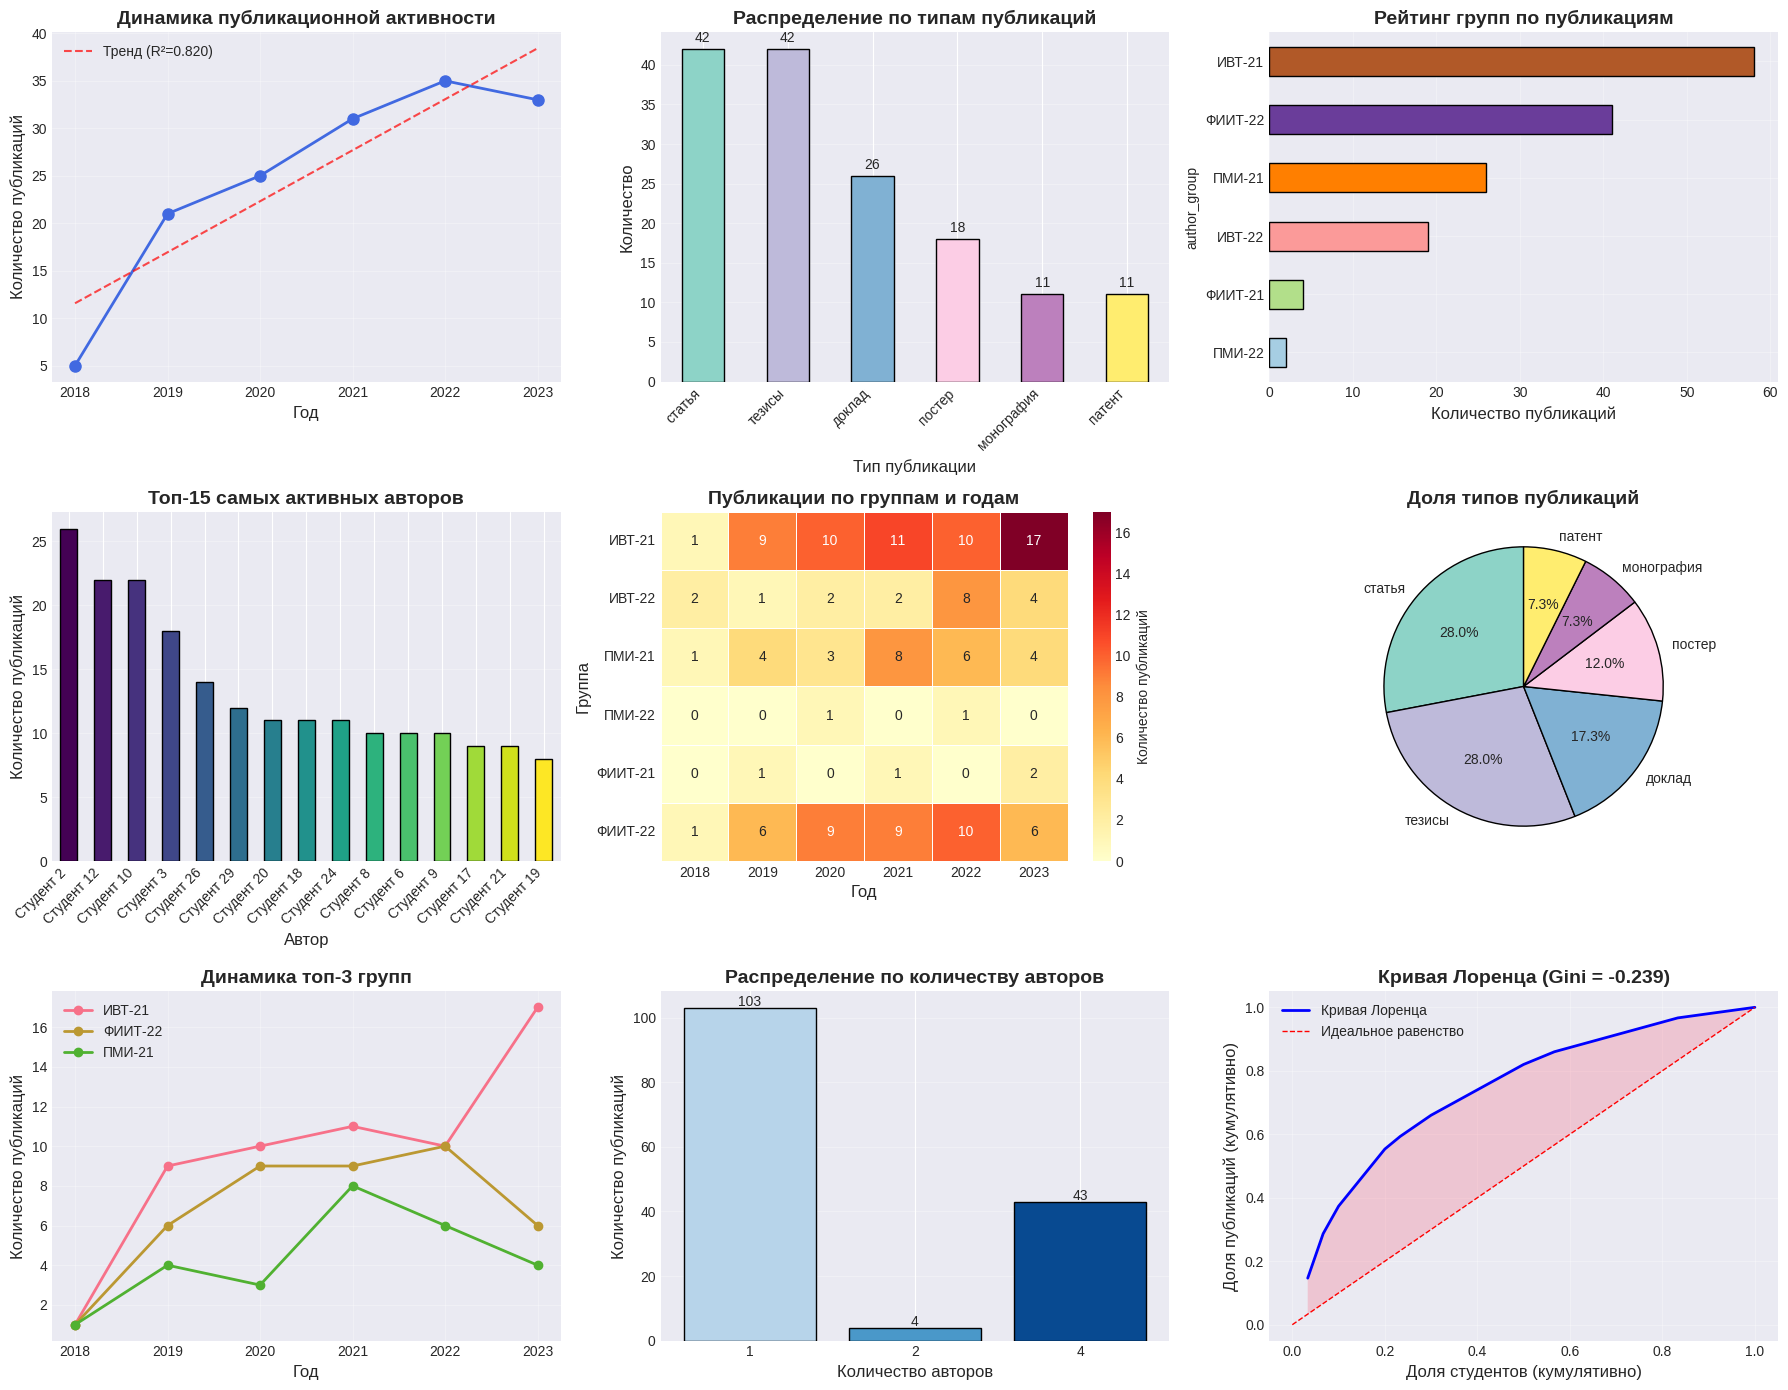

In [ ]:
print("="*80)
print("📊 ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("="*80)

# Создаем фигуру с несколькими графиками
fig = plt.figure(figsize=(18, 14))

# 1. Динамика публикаций по годам
ax1 = plt.subplot(3, 3, 1)
publications_by_year.plot(kind='line', marker='o', linewidth=2, markersize=8, color='royalblue')
plt.title('Динамика публикационной активности', fontsize=14, fontweight='bold')
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество публикаций', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(years)

# Добавляем трендовую линию
if len(publications_by_year) > 1:
    x = np.array(list(publications_by_year.index))
    y = np.array(list(publications_by_year.values))
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", alpha=0.7, label=f'Тренд (R²={(np.corrcoef(x, y)[0,1]**2):.3f})')
    plt.legend()

# 2. Распределение по типам публикаций
ax2 = plt.subplot(3, 3, 2)
colors_type = plt.cm.Set3(np.linspace(0, 1, len(publications_by_type)))
bars = publications_by_type.plot(kind='bar', color=colors_type, edgecolor='black')
plt.title('Распределение по типам публикаций', fontsize=14, fontweight='bold')
plt.xlabel('Тип публикации', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for i, (bar, count) in enumerate(zip(bars.patches, publications_by_type.values)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(count),
            ha='center', va='bottom', fontsize=10)

# 3. Рейтинг групп
ax3 = plt.subplot(3, 3, 3)
colors_group = plt.cm.Paired(np.linspace(0, 1, len(group_publications)))
group_publications.sort_values().plot(kind='barh', color=colors_group, edgecolor='black')
plt.title('Рейтинг групп по публикациям', fontsize=14, fontweight='bold')
plt.xlabel('Количество публикаций', fontsize=12)
plt.grid(True, alpha=0.3)

# 4. Топ-15 авторов
ax4 = plt.subplot(3, 3, 4)
top_15_authors = pd.Series(dict(author_counts.most_common(15)))
colors_authors = plt.cm.viridis(np.linspace(0, 1, len(top_15_authors)))
top_15_authors.plot(kind='bar', color=colors_authors, edgecolor='black')
plt.title('Топ-15 самых активных авторов', fontsize=14, fontweight='bold')
plt.xlabel('Автор', fontsize=12)
plt.ylabel('Количество публикаций', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

# 5. Heatmap: группы по годам
ax5 = plt.subplot(3, 3, 5)
heatmap_data = pd.pivot_table(df,
                              values='id',
                              index='author_group',
                              columns='year',
                              aggfunc='count',
                              fill_value=0)

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd',
            linewidths=0.5, ax=ax5, cbar_kws={'label': 'Количество публикаций'})
plt.title('Публикации по группам и годам', fontsize=14, fontweight='bold')
plt.xlabel('Год', fontsize=12)
plt.ylabel('Группа', fontsize=12)

# 6. Круговая диаграмма распределения по типам
ax6 = plt.subplot(3, 3, 6)
publications_by_type.plot(kind='pie', autopct='%1.1f%%', startangle=90,
                         colors=plt.cm.Set3(np.linspace(0, 1, len(publications_by_type))),
                         wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Доля типов публикаций', fontsize=14, fontweight='bold')
plt.ylabel('')

# 7. Динамика топ-3 групп
ax7 = plt.subplot(3, 3, 7)
top_3_groups = group_publications.head(3).index.tolist()

for group in top_3_groups:
    group_data = df[df['author_group'] == group].groupby('year').size()
    group_data = group_data.reindex(years, fill_value=0)
    plt.plot(years, group_data.values, marker='o', linewidth=2, markersize=6, label=group)

plt.title('Динамика топ-3 групп', fontsize=14, fontweight='bold')
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество публикаций', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(years)

# 8. Распределение по количеству авторов
ax8 = plt.subplot(3, 3, 8)
collab_counts = df['num_authors'].value_counts().sort_index()
colors_collab = plt.cm.Blues(np.linspace(0.3, 0.9, len(collab_counts)))

plt.bar(range(len(collab_counts)), collab_counts.values, color=colors_collab, edgecolor='black')
plt.title('Распределение по количеству авторов', fontsize=14, fontweight='bold')
plt.xlabel('Количество авторов', fontsize=12)
plt.ylabel('Количество публикаций', fontsize=12)
plt.xticks(range(len(collab_counts)), collab_counts.index)
plt.grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for i, v in enumerate(collab_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=10)

# 9. Кривая Лоренца
ax9 = plt.subplot(3, 3, 9)
plt.plot(cumulative_students, cumulative_publications, 'b-', linewidth=2, label='Кривая Лоренца')
plt.plot([0, 1], [0, 1], 'r--', linewidth=1, label='Идеальное равенство')
plt.fill_between(cumulative_students, cumulative_publications, cumulative_students, alpha=0.3)

plt.title(f'Кривая Лоренца (Gini = {gini_coefficient:.3f})', fontsize=14, fontweight='bold')
plt.xlabel('Доля студентов (кумулятивно)', fontsize=12)
plt.ylabel('Доля публикаций (кумулятивно)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()